In [4]:
import pickle
import sympy as sp

In [5]:
import sympy as sp

In [6]:
r= sp.symbols('r')
q=sp.symbols('q')
v=sp.symbols('v')
vp=sp.symbols('vp')
rp=sp.symbols('rp')
qp=sp.symbols('qp')
t=sp.symbols('t')
(ppc)=sp.symbols('(ppc)')
(pdm)=sp.symbols('(pdm)')
(pmp)=sp.symbols('(pmp)')
p_pair=sp.symbols('p_pair')

In [7]:
i_m = sp.symbols('i_m')
j_m = sp.symbols('j_m')
k_m = sp.symbols('k_m')
l_m = sp.symbols('l_m')
G = sp.symbols('G')
g = sp.symbols('g')
a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4 = sp.symbols('a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4')

In [5]:
modes_base = [[[i_m, G, i_m], [i_m, G, i_m]],
 [[i_m, G, j_m], [i_m, G, j_m]],
 [[i_m, G, i_m], [i_m, G, j_m]],
 [[i_m, G, j_m], [i_m, G, k_m]],
 [[i_m, G, i_m], [j_m, G, i_m]],
 [[i_m, G, j_m], [k_m, G, j_m]],
 [[i_m, G, i_m], [j_m, G, j_m]],
 [[i_m, G, i_m], [j_m, G, k_m]],
 [[i_m, G, j_m], [j_m, G, i_m]],
 [[i_m, G, j_m], [j_m, G, k_m]],
 [[i_m, G, j_m], [k_m, G, l_m]],
 [[i_m, G, i_m], [i_m, g, j_m]],
 [[i_m, G, i_m], [j_m, g, i_m]],
 [[i_m, G, i_m], [j_m, g, k_m]],
 [[i_m, G, j_m], [j_m, g, k_m]],
 [[i_m, g, i_m], [i_m, G, i_m]],
 [[i_m, g, j_m], [i_m, G, j_m]],
 [[i_m, g, i_m], [i_m, G, j_m]],
 [[i_m, g, j_m], [i_m, G, k_m]],
 [[i_m, g, i_m], [j_m, G, i_m]],
 [[i_m, g, j_m], [k_m, G, j_m]],
 [[i_m, g, i_m], [j_m, G, j_m]],
 [[i_m, g, i_m], [j_m, G, k_m]],
 [[i_m, g, j_m], [j_m, G, i_m]],
 [[i_m, g, j_m], [j_m, G, k_m]],
 [[i_m, g, j_m], [k_m, G, l_m]],
 [[i_m, g, i_m], [i_m, g, i_m]],
 [[i_m, g, j_m], [i_m, g, j_m]],
 [[i_m, g, i_m], [i_m, g, j_m]],
 [[i_m, g, j_m], [i_m, g, k_m]],
 [[i_m, g, i_m], [j_m, g, i_m]],
 [[i_m, g, j_m], [k_m, g, j_m]],
 [[i_m, g, i_m], [j_m, g, j_m]],
 [[i_m, g, i_m], [j_m, g, k_m]],
 [[i_m, g, j_m], [j_m, g, i_m]],
 [[i_m, g, j_m], [j_m, g, k_m]],
 [[i_m, g, j_m], [k_m, g, l_m]]]

In [6]:
biv_lst = []

with open("biv/biv_res.out",'rb') as inf:
        res_0_file = pickle.load(inf)

#biv_lst.append([i,[sp.factor(sum([res_0_file[i][0] for i in [3 * j + k for k in range(3)]])) for j in range(4)]])

In [7]:
quad_A_lst = []

with open("quad_A/quad_A_res.out",'rb') as inf:
    res_1_0_file = pickle.load(inf)

#quad_A_lst.append([i,[sp.factor(sum([res_1_0_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [8]:
quad_B_lst = []

with open("quad_B/quad_B_res.out",'rb') as inf:
    res_1_1_file = pickle.load(inf)
    
#quad_B_lst.append([i,[sp.factor(sum([res_1_1_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [9]:
quad_C_lst = []

with open("quad_C/quad_C_res.out",'rb') as inf:
    res_1_2_file = pickle.load(inf)
    
#quad_C_lst.append([i,[sp.factor(sum([res_1_2_file[i][0] for i in [24 * j + k for k in range(24)]])) for j in range(4)]])

In [10]:
import itertools

modes = modes_base

def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 0:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 1:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

modes_comb_base = modes_comb

In [11]:
modes_comb_base

[[[a1, G, c1], [a1, G, c1]],
 [[a2, G, c2], [a2, G, c2]],
 [[a3, G, c3], [a3, G, c3]],
 [[a4, G, c4], [a4, G, c4]],
 [[a1, G, c2], [a1, G, c2]],
 [[a1, G, c3], [a1, G, c3]],
 [[a1, G, c4], [a1, G, c4]],
 [[a2, G, c1], [a2, G, c1]],
 [[a2, G, c3], [a2, G, c3]],
 [[a2, G, c4], [a2, G, c4]],
 [[a3, G, c1], [a3, G, c1]],
 [[a3, G, c2], [a3, G, c2]],
 [[a3, G, c4], [a3, G, c4]],
 [[a4, G, c1], [a4, G, c1]],
 [[a4, G, c2], [a4, G, c2]],
 [[a4, G, c3], [a4, G, c3]],
 [[a1, G, c1], [a1, G, c2]],
 [[a1, G, c1], [a1, G, c3]],
 [[a1, G, c1], [a1, G, c4]],
 [[a2, G, c2], [a2, G, c1]],
 [[a2, G, c2], [a2, G, c3]],
 [[a2, G, c2], [a2, G, c4]],
 [[a3, G, c3], [a3, G, c1]],
 [[a3, G, c3], [a3, G, c2]],
 [[a3, G, c3], [a3, G, c4]],
 [[a4, G, c4], [a4, G, c1]],
 [[a4, G, c4], [a4, G, c2]],
 [[a4, G, c4], [a4, G, c3]],
 [[a1, G, c2], [a1, G, c3]],
 [[a1, G, c2], [a1, G, c4]],
 [[a1, G, c3], [a1, G, c2]],
 [[a1, G, c3], [a1, G, c4]],
 [[a1, G, c4], [a1, G, c2]],
 [[a1, G, c4], [a1, G, c3]],
 [[a2, G, c1],

In [12]:
len(modes_comb_base)

624

In [13]:
modes_unordered = []
for i in range(len(modes_base)):
    if modes_base[i][0][1] != modes_base[i][1][1]:
        modes_unordered.append([modes_base[i][1],modes_base[i][0]])

In [14]:
import itertools

modes = modes_unordered

def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 0:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 1:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

In [15]:
modes_comb_unordered = modes_comb

In [16]:
modes_comb_unordered_2_id = [2,4,7,9,28,30,33,35]

In [17]:
import itertools

i_m = sp.symbols('i_m')
j_m = sp.symbols('j_m')
k_m = sp.symbols('k_m')
l_m = sp.symbols('l_m')
G = sp.symbols('G')
g = sp.symbols('g')
a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4 = sp.symbols('a1,a2,b1,b2,a3,a4,b3,b2,b4,c1,c2,c3,c4')

modes = [[modes_base[item][1],modes_base[item][0]] \
                                 for item in modes_comb_unordered_2_id]
 
def num_letters_not_Gg(m):
    tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
    tmp_set = set(tmp) - set([G,g])
    tmp_lst = list(tmp_set)
    
    return len(tmp_lst)
 
modes_w_numbers = []
modes_w_numbers_id = []
mode_count = -1
for mode in modes:
    chr_count = num_letters_not_Gg(mode)
    combs = list(itertools.permutations(range(4),chr_count))
    mode_count = mode_count + 1
    
    for comb in combs:
        if chr_count == 1:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                for index in indexes:
                    sub_mode[index] = comb[0]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 2:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 3:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        elif chr_count == 4:
            tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
            for sub_mode in tmp_mode:
                indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                for index in indexes_i_m:
                    sub_mode[index] = comb[0]
                for index in indexes_j_m:
                    sub_mode[index] = comb[1]
                for index in indexes_k_m:
                    sub_mode[index] = comb[2]
                for index in indexes_l_m:
                    sub_mode[index] = comb[3]
            modes_w_numbers.append(tmp_mode)
            modes_w_numbers_id.append(mode_count)
        else:
            print('Error')

modes_comb = []

for gam in modes_w_numbers:
    tmp_gam = []
    for chr in gam:
        tmp_chr = []
        locus = -1
        for allele in chr:
            tmp_allele = allele
            locus = locus + 1
            if locus == 0:
                if allele == 0:
                    tmp_allele = a1
                elif allele == 1:
                    tmp_allele = a2
                elif allele == 2:
                    tmp_allele = a3
                elif allele == 3:
                    tmp_allele = a4
                else:
                    print('error')
            elif locus == 1:
                if allele == G:
                    tmp_allele = G
                elif allele == g:
                    tmp_allele = g
                else:
                    print('error')
            elif locus == 2:
                if allele == 0:
                    tmp_allele = c1
                elif allele == 1:
                    tmp_allele = c2
                elif allele == 2:
                    tmp_allele = c3
                elif allele == 3:
                    tmp_allele = c4
                else:
                    print('error')
            else:
                print('error')
            tmp_chr.append(tmp_allele)
        tmp_gam.append(tmp_chr)
    modes_comb.append(tmp_gam)

In [18]:
modes_comb_unordered_2 = modes_comb

In [19]:
dupl_lst = []

for i in range(len(modes_comb_unordered)):
    for j in range(len(modes_comb_base)):
        if [modes_comb_unordered[i][1],modes_comb_unordered[i][0]] \
                        == modes_comb_base[j]:
            dupl_lst.append(j)
            
for i in range(len(modes_comb_unordered_2)):
    for j in range(len(modes_comb_base)):
        if [modes_comb_unordered_2[i][1],modes_comb_unordered_2[i][0]] \
                        == modes_comb_base[j]:
            dupl_lst.append(j)
            

In [20]:
len(dupl_lst)

400

In [21]:
mode_prob = [(dupl_lst.count(mode) + 1) *
    (sum([res_0_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_0_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_1_file[arrng][0][mode] for arrng in range(24)]) +
    sum([res_1_2_file[arrng][0][mode] for arrng in range(24)])) for mode in range(624)]

In [22]:
tot_prob = 0

for mode in range(624):
    if mode_prob[mode] == 0:
        tot_prob = tot_prob + 0
    else:
        tot_prob = tot_prob + mode_prob[mode].subs(ppc,0.25).subs(pmp,0.25).subs(pdm,0.25) \
                    .subs(r,0.5).subs(q,0.5).subs(v,0.5).subs(rp,0.5).subs(qp,0.5).subs(vp,0.5) \
                    .subs(t,1).subs(p_pair,0.)

In [23]:
tot_prob

0.999999999999999

In [24]:
[sp.simplify(sum(mode_prob))]

[1]

In [25]:
f = open('mode_prob_dwnstr_middle_GGgg.txt', 'w')

In [26]:
for i in range(len(mode_prob)):
    f.write(str(mode_prob[i])+'\n')

In [27]:
f.close()

Below is a comparison of gamete mode probabilities from the original paper with those in the correction and where gamete combinations are collapsed into 37 modes.

The sum of the differences between mode probabilities does not equal zero, which pointed to a potential error, which we found to be in the application of a compound or/and statement in the original Supplements.

In [41]:
mode_prob_GA23 = [[0,
  [-(ppc)*t*vp*(vp - 1)*(2*q*r - q - r + 1)**2/2,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 4*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 2*p_pair**2*q*r**2 + 4*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 18*q**2*r**2*vp + 18*q**2*r**2 + 18*q**2*r*vp - 18*q**2*r - 5*q**2*vp + 5*q**2 + 18*q*r**2*vp - 18*q*r**2 - 28*q*r*vp + 28*q*r + 10*q*vp - 10*q - 5*r**2*vp + 5*r**2 + 10*r*vp - 10*r - 5*vp + 5)/16,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 4*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 2*p_pair**2*q*r**2 + 4*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 6*q**2*r**2*vp + 6*q**2*r**2 + 6*q**2*r*vp - 6*q**2*r - 2*q**2*vp + 2*q**2 + 6*q*r**2*vp - 6*q*r**2 - 10*q*r*vp + 10*q*r + 4*q*vp - 4*q - 2*r**2*vp + 2*r**2 + 4*r*vp - 4*r - 2*vp + 2)/12,
   (ppc)*t*vp*(-4*p_pair**4*q**2*r**2*vp + 4*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 4*p_pair**3*q**2*r**2 - 4*p_pair**3*q**2*r + p_pair**3*q**2 + 4*p_pair**3*q*r**2*vp - 6*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 4*p_pair**2*q*r**2 + 6*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 20*q**2*r**2*vp + 20*q**2*r**2 + 20*q**2*r*vp - 20*q**2*r - 5*q**2*vp + 5*q**2 + 20*q*r**2*vp - 20*q*r**2 - 30*q*r*vp + 30*q*r + 10*q*vp - 10*q - 5*r**2*vp + 5*r**2 + 10*r*vp - 10*r - 5*vp + 5)/16]],
 [1,
  [-(ppc)*t*vp*(vp - 1)*(-2*q*r + q + r)**2/2,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 2*p_pair**2*q*r**2 - p_pair**2*r**2*vp + p_pair*r**2 - 18*q**2*r**2*vp + 18*q**2*r**2 + 18*q**2*r*vp - 18*q**2*r - 5*q**2*vp + 5*q**2 + 18*q*r**2*vp - 18*q*r**2 - 8*q*r*vp + 8*q*r - 5*r**2*vp + 5*r**2)/16,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 2*p_pair**2*q*r**2 - p_pair**2*r**2*vp + p_pair*r**2 - 6*q**2*r**2*vp + 6*q**2*r**2 + 6*q**2*r*vp - 6*q**2*r - 2*q**2*vp + 2*q**2 + 6*q*r**2*vp - 6*q*r**2 - 2*q*r*vp + 2*q*r - 2*r**2*vp + 2*r**2)/12,
   (ppc)*t*vp*(-4*p_pair**4*q**2*r**2*vp + 4*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 4*p_pair**3*q**2*r**2 - 4*p_pair**3*q**2*r + p_pair**3*q**2 + 4*p_pair**3*q*r**2*vp - 2*p_pair**3*q*r*vp - 4*p_pair**2*q*r**2 + 2*p_pair**2*q*r - p_pair**2*r**2*vp + p_pair*r**2 - 20*q**2*r**2*vp + 20*q**2*r**2 + 20*q**2*r*vp - 20*q**2*r - 5*q**2*vp + 5*q**2 + 20*q*r**2*vp - 20*q*r**2 - 10*q*r*vp + 10*q*r - 5*r**2*vp + 5*r**2)/16]],
 [2,
  [-(ppc)*t*vp*(vp - 1)*(-2*q*r + q + r)*(2*q*r - q - r + 1),
   (ppc)*t*vp*(2*p_pair**4*q**2*r**2*vp - 2*p_pair**4*q**2*r*vp - 2*p_pair**3*q**2*r**2 + 2*p_pair**3*q**2*r - 2*p_pair**3*q*r**2*vp + 2*p_pair**3*q*r*vp + 2*p_pair**2*q*r**2 - 2*p_pair**2*q*r + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 18*q**2*r**2*vp - 18*q**2*r**2 - 18*q**2*r*vp + 18*q**2*r + 4*q**2*vp - 4*q**2 - 18*q*r**2*vp + 18*q*r**2 + 18*q*r*vp - 18*q*r - 4*q*vp + 4*q + 5*r**2*vp - 5*r**2 - 5*r*vp + 5*r)/8,
   (ppc)*t*vp*(2*p_pair**4*q**2*r**2*vp - 2*p_pair**4*q**2*r*vp - 2*p_pair**3*q**2*r**2 + 2*p_pair**3*q**2*r - 2*p_pair**3*q*r**2*vp + 2*p_pair**3*q*r*vp + 2*p_pair**2*q*r**2 - 2*p_pair**2*q*r + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 6*q**2*r**2*vp - 6*q**2*r**2 - 6*q**2*r*vp + 6*q**2*r + q**2*vp - q**2 - 6*q*r**2*vp + 6*q*r**2 + 6*q*r*vp - 6*q*r - q*vp + q + 2*r**2*vp - 2*r**2 - 2*r*vp + 2*r)/6,
   (ppc)*t*vp*(4*p_pair**4*q**2*r**2*vp - 4*p_pair**4*q**2*r*vp + p_pair**4*q**2*vp - 4*p_pair**3*q**2*r**2 + 4*p_pair**3*q**2*r - p_pair**3*q**2 - 4*p_pair**3*q*r**2*vp + 4*p_pair**3*q*r*vp - p_pair**3*q*vp + 4*p_pair**2*q*r**2 - 4*p_pair**2*q*r + p_pair**2*q + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 20*q**2*r**2*vp - 20*q**2*r**2 - 20*q**2*r*vp + 20*q**2*r + 5*q**2*vp - 5*q**2 - 20*q*r**2*vp + 20*q*r**2 + 20*q*r*vp - 20*q*r - 5*q*vp + 5*q + 5*r**2*vp - 5*r**2 - 5*r*vp + 5*r)/8]],
 [3, [0, 0, 0, 0]],
 [4,
  [t*(-(pdm)*rp*(rp - 1)*(2*q*rp - q - rp + 1) - (pmp)*(qp - 1)*(-2*qp*r + qp + r)*(2*qp*r - qp - r + 1) + (ppc)*(2*vp**2 - 2*vp + 1)*(-2*q*r + q + r)*(2*q*r - q - r + 1))/2,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 6*q*rp - 3*q - 4*rp + 4) + (pmp)*(qp - 1)*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 18*qp**2*r**2 - 18*qp**2*r + 5*qp**2 - 18*qp*r**2 + 18*qp*r - 5*qp + 4*r**2 - 4*r) - (ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 2*p_pair**2*q*vp - 2*p_pair*q*r**2 + 2*p_pair*q*r - p_pair*q + 36*q**2*r**2*vp**2 - 36*q**2*r**2*vp + 18*q**2*r**2 - 36*q**2*r*vp**2 + 36*q**2*r*vp - 18*q**2*r + 10*q**2*vp**2 - 10*q**2*vp + 5*q**2 - 36*q*r**2*vp**2 + 36*q*r**2*vp - 18*q*r**2 + 36*q*r*vp**2 - 36*q*r*vp + 18*q*r - 10*q*vp**2 + 10*q*vp - 5*q + 8*r**2*vp**2 - 8*r**2*vp + 4*r**2 - 8*r*vp**2 + 8*r*vp - 4*r))/16,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2) + 2*(pmp)*(qp - 1)*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + 2*qp**2 - 6*qp*r**2 + 6*qp*r - 2*qp + r**2 - r) - 2*(ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 2*p_pair**2*q*vp - 2*p_pair*q*r**2 + 2*p_pair*q*r - p_pair*q + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 6*q*r**2 + 12*q*r*vp**2 - 12*q*r*vp + 6*q*r - 4*q*vp**2 + 4*q*vp - 2*q + 2*r**2*vp**2 - 2*r**2*vp + r**2 - 2*r*vp**2 + 2*r*vp - r))/24,
   t*(-3*(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 6*q*rp - 3*q - 4*rp + 4) + 2*(pmp)*(qp - 1)*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 - 4*p_pair*qp*r**2 + 4*p_pair*qp*r - p_pair*qp + 20*qp**2*r**2 - 20*qp**2*r + 5*qp**2 - 20*qp*r**2 + 20*qp*r - 5*qp + 6*r**2 - 6*r) - 2*(ppc)*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 8*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 8*p_pair**2*q*r*vp + 2*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 2*p_pair**2*r*vp**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q - 2*p_pair*r**2*vp + 2*p_pair*r*vp + 40*q**2*r**2*vp**2 - 40*q**2*r**2*vp + 20*q**2*r**2 - 40*q**2*r*vp**2 + 40*q**2*r*vp - 20*q**2*r + 10*q**2*vp**2 - 10*q**2*vp + 5*q**2 - 40*q*r**2*vp**2 + 40*q*r**2*vp - 20*q*r**2 + 40*q*r*vp**2 - 40*q*r*vp + 20*q*r - 10*q*vp**2 + 10*q*vp - 5*q + 10*r**2*vp**2 - 10*r**2*vp + 6*r**2 - 10*r*vp**2 + 10*r*vp - 6*r))/32]],
 [5,
  [t*(-(pdm)*rp*(rp - 1)*(-2*q*rp + q + rp) + (pmp)*qp*(-2*qp*r + qp + r)*(2*qp*r - qp - r + 1))/2,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 6*q*rp + 3*q + 4*rp) + (pmp)*qp*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 18*qp**2*r**2 - 18*qp**2*r + 5*qp**2 - 18*qp*r**2 + 18*qp*r - 5*qp + 4*r**2 - 4*r))/16,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 2*q*rp + q + 2*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + 2*qp**2 - 6*qp*r**2 + 6*qp*r - 2*qp + r**2 - r))/24,
   -t*(3*(pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 6*q*rp + 3*q + 4*rp) + 2*(pmp)*qp*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 - 4*p_pair*qp*r**2 + 4*p_pair*qp*r - p_pair*qp + 20*qp**2*r**2 - 20*qp**2*r + 5*qp**2 - 20*qp*r**2 + 20*qp*r - 5*qp + 6*r**2 - 6*r))/32]],
 [6,
  [(pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)**2/4 + (pmp)*t*(qp - 1)**2*(2*qp*r - qp - r + 1)*(6*qp*r - 3*qp - 3*r + 4)/4 + (ppc)*t*(2*q*r - q - r + 1)*(4*q*r*vp**2 - 4*q*r*vp + 6*q*r - 2*q*vp**2 + 2*q*vp - 3*q - 2*r*vp**2 + 2*r*vp - 3*r + 2*vp**2 - 2*vp + 4)/4 + (-(pdm)*t - (pmp)*t - (ppc)*t + 1)*(2*q*r - q - r + 1)**2,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/16 + (pmp)*t*(qp - 1)**2*(p_pair**2*qp**2*r**2 - p_pair**2*qp**2*r + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 5*p_pair*qp*r**2 + 7*p_pair*qp*r - 2*p_pair*qp + 17*qp**2*r**2 - 17*qp**2*r + 4*qp**2 - 21*qp*r**2 + 35*qp*r - 12*qp + 6*r**2 - 14*r + 8)/16 + (ppc)*t*(2*p_pair**4*q**2*r**2*vp**2 - 2*p_pair**4*q**2*r*vp**2 - 2*p_pair**3*q**2*r**2*vp + 2*p_pair**3*q**2*r*vp - 2*p_pair**3*q*r**2*vp**2 + 2*p_pair**3*q*r*vp**2 + p_pair**2*q**2*r**2 - p_pair**2*q**2*r + 2*p_pair**2*q*r**2*vp - 2*p_pair**2*q*r*vp + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 5*p_pair*q*r**2 + 7*p_pair*q*r - 2*p_pair*q + 18*q**2*r**2*vp**2 - 18*q**2*r**2*vp + 17*q**2*r**2 - 18*q**2*r*vp**2 + 18*q**2*r*vp - 17*q**2*r + 4*q**2*vp**2 - 4*q**2*vp + 4*q**2 - 18*q*r**2*vp**2 + 18*q*r**2*vp - 21*q*r**2 + 26*q*r*vp**2 - 26*q*r*vp + 35*q*r - 8*q*vp**2 + 8*q*vp - 12*q + 4*r**2*vp**2 - 4*r**2*vp + 6*r**2 - 8*r*vp**2 + 8*r*vp - 14*r + 4*vp**2 - 4*vp + 8)/16 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/6,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q - rp + 1)/24 + (pmp)*t*(qp - 1)**2*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 6*p_pair*qp*r**2 + 8*p_pair*qp*r - 2*p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + qp**2 - 10*qp*r**2 + 16*qp*r - 5*qp + 3*r**2 - 7*r + 4)/24 + (ppc)*t*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 6*p_pair*q*r**2 + 8*p_pair*q*r - 2*p_pair*q + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 10*q*r**2 + 16*q*r*vp**2 - 16*q*r*vp + 16*q*r - 4*q*vp**2 + 4*q*vp - 5*q + 2*r**2*vp**2 - 2*r**2*vp + 3*r**2 - 4*r*vp**2 + 4*r*vp - 7*r + 2*vp**2 - 2*vp + 4)/24 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(2*p_pair*q*r - p_pair*q - r + 1)/6,
   3*(pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/32 + (pmp)*t*(qp - 1)**2*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 + 24*p_pair*qp**2*r**2 - 24*p_pair*qp**2*r + 6*p_pair*qp**2 - 16*p_pair*qp*r**2 + 26*p_pair*qp*r - 9*p_pair*qp + 44*qp**2*r**2 - 44*qp**2*r + 11*qp**2 - 56*qp*r**2 + 94*qp*r - 33*qp + 18*r**2 - 42*r + 24)/32 + (ppc)*t*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 12*p_pair**3*q*r*vp**2 - 4*p_pair**3*q*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 12*p_pair**2*q*r*vp + 4*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair**2*r*vp**2 + 2*p_pair**2*vp**2 + 24*p_pair*q**2*r**2 - 24*p_pair*q**2*r + 6*p_pair*q**2 - 16*p_pair*q*r**2 + 26*p_pair*q*r - 9*p_pair*q - 2*p_pair*r**2*vp + 4*p_pair*r*vp - 2*p_pair*vp + 40*q**2*r**2*vp**2 - 40*q**2*r**2*vp + 44*q**2*r**2 - 40*q**2*r*vp**2 + 40*q**2*r*vp - 44*q**2*r + 10*q**2*vp**2 - 10*q**2*vp + 11*q**2 - 40*q*r**2*vp**2 + 40*q*r**2*vp - 56*q*r**2 + 60*q*r*vp**2 - 60*q*r*vp + 94*q*r - 20*q*vp**2 + 20*q*vp - 33*q + 10*r**2*vp**2 - 10*r**2*vp + 18*r**2 - 20*r*vp**2 + 20*r*vp - 42*r + 10*vp**2 - 10*vp + 24)/32 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/4]],
 [7,
  [-(pdm)*t*(rp - 1)*(2*q*rp - q - rp + 1)*(6*q*rp**2 - 11*q*rp + 4*q - 3*rp**2 + 6*rp)/2 - (pmp)*t*(qp - 1)*(2*qp*r - qp - r + 1)*(6*qp**2*r - 3*qp**2 - 7*qp*r + 6*qp + 2*r)/2 + (ppc)*t*(-2*q*r + q + r)*(2*q*r - q - r + 1) - 2*(-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1),
   -(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q + 24*q**2*rp**3 - 56*q**2*rp**2 + 38*q**2*rp - 8*q**2 - 36*q*rp**3 + 96*q*rp**2 - 63*q*rp + 12*q + 12*rp**3 - 36*rp**2 + 24*rp)/16 - (pmp)*t*(qp - 1)*(p_pair**2*qp**3*r**2 - p_pair**2*qp**3*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 13*p_pair*qp**2*r**2 + 15*p_pair*qp**2*r - 4*p_pair*qp**2 + 4*p_pair*qp*r**2 - 4*p_pair*qp*r + p_pair*qp + 17*qp**3*r**2 - 17*qp**3*r + 4*qp**3 - 29*qp**2*r**2 + 43*qp**2*r - 14*qp**2 + 18*qp*r**2 - 26*qp*r + 11*qp - 4*r**2 + 4*r)/8 - (ppc)*t*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/8 + ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 4*q**2*r**2 - 4*q**2*r + q**2 - 8*q*r**2 + 8*q*r - 2*q + 3*r**2 - 3*r)/3,
   -(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q - 12*q*rp**3 + 32*q*rp**2 - 21*q*rp + 4*q + 6*rp**3 - 18*rp**2 + 12*rp)/24 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 16*p_pair*qp**2*r - 4*p_pair*qp**2 + 4*p_pair*qp*r**2 - 4*p_pair*qp*r + p_pair*qp + 6*qp**3*r**2 - 6*qp**3*r + qp**3 - 10*qp**2*r**2 + 16*qp**2*r - 5*qp**2 + 7*qp*r**2 - 11*qp*r + 5*qp - 2*r**2 + 2*r)/12 + (ppc)*t*(-8*p_pair*q**2*r**2 + 8*p_pair*q**2*r - 2*p_pair*q**2 + 4*p_pair*q*r**2 - 4*p_pair*q*r + p_pair*q + 4*q*r**2 - 4*q*r + q - 2*r**2 + 2*r)/12 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-8*p_pair*q**2*r**2 + 8*p_pair*q**2*r - 2*p_pair*q**2 + 4*p_pair*q*r**2 - 4*p_pair*q*r + p_pair*q + 4*q*r**2 - 4*q*r + q - 2*r**2 + 2*r)/6,
   -3*(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q + 24*q**2*rp**3 - 56*q**2*rp**2 + 38*q**2*rp - 8*q**2 - 36*q*rp**3 + 96*q*rp**2 - 63*q*rp + 12*q + 12*rp**3 - 36*rp**2 + 24*rp)/32 - (pmp)*t*(qp - 1)*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 + 24*p_pair*qp**3*r**2 - 24*p_pair*qp**3*r + 6*p_pair*qp**3 - 40*p_pair*qp**2*r**2 + 50*p_pair*qp**2*r - 15*p_pair*qp**2 + 12*p_pair*qp*r**2 - 12*p_pair*qp*r + 3*p_pair*qp + 44*qp**3*r**2 - 44*qp**3*r + 11*qp**3 - 80*qp**2*r**2 + 118*qp**2*r - 39*qp**2 + 54*qp*r**2 - 78*qp*r + 33*qp - 12*r**2 + 12*r)/16 - 3*(ppc)*t*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/16 + ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 4*q**2*r**2 - 4*q**2*r + q**2 - 8*q*r**2 + 8*q*r - 2*q + 3*r**2 - 3*r)/2]],
 [8,
  [t*((pdm)*rp*(12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 12*q*rp**3 + 6*q*rp**2 + 4*q*rp - 2*q + 3*rp**3 - rp**2 - rp + 1) - (pmp)*(-2*qp*r + qp + r)*(6*qp**3*r - 3*qp**3 - 7*qp**2*r + qp**2 + 4*qp*r + qp - r - 1) + (ppc)*(-2*q*r + q + r)*(-4*q*r*vp**2 + 4*q*r*vp - 2*q*r + 2*q*vp**2 - 2*q*vp + q + 2*r*vp**2 - 2*r*vp + r + 1))/4,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 9*q*rp**2 + 6*q*rp - 3*q + 6*rp**3 - 2*rp**2 - 2*rp + 2) + (pmp)*(p_pair**2*qp**4*r**2 - p_pair**2*qp**4*r - 2*p_pair**2*qp**3*r**2 + 2*p_pair**2*qp**3*r + p_pair**2*qp**2*r**2 - p_pair**2*qp**2*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 5*p_pair*qp**3*r**2 + 3*p_pair*qp**3*r + 2*p_pair*qp**2*r**2 - 2*p_pair*qp**2*r - p_pair*qp*r**2 + p_pair*qp*r + 17*qp**4*r**2 - 17*qp**4*r + 4*qp**4 - 39*qp**3*r**2 + 25*qp**3*r - 2*qp**3 + 33*qp**2*r**2 - 9*qp**2*r - 2*qp**2 - 13*qp*r**2 - 3*qp*r + 2*qp + 2*r**2 + 2*r) + (ppc)*(2*p_pair**4*q**2*r**2*vp**2 - 2*p_pair**4*q**2*r*vp**2 - 2*p_pair**3*q**2*r**2*vp + 2*p_pair**3*q**2*r*vp - 2*p_pair**3*q*r**2*vp**2 + 2*p_pair**3*q*r*vp**2 + p_pair**2*q**2*r**2 - p_pair**2*q**2*r + 2*p_pair**2*q*r**2*vp - 2*p_pair**2*q*r*vp - p_pair*q*r**2 + p_pair*q*r + 18*q**2*r**2*vp**2 - 18*q**2*r**2*vp + 9*q**2*r**2 - 18*q**2*r*vp**2 + 18*q**2*r*vp - 9*q**2*r + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 18*q*r**2*vp**2 + 18*q*r**2*vp - 9*q*r**2 + 10*q*r*vp**2 - 10*q*r*vp + q*r + 2*q + 4*r**2*vp**2 - 4*r**2*vp + 2*r**2 + 2*r))/16,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q - 6*q*rp**3 + 3*q*rp**2 + 2*q*rp - q + 3*rp**3 - rp**2 - rp + 1) + (pmp)*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r - 4*p_pair**2*qp**3*r**2 + 4*p_pair**2*qp**3*r + 2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 6*p_pair*qp**3*r**2 + 4*p_pair*qp**3*r + 4*p_pair*qp**2*r**2 - 4*p_pair*qp**2*r - 2*p_pair*qp*r**2 + 2*p_pair*qp*r + 6*qp**4*r**2 - 6*qp**4*r + qp**4 - 22*qp**3*r**2 + 16*qp**3*r - qp**3 + 21*qp**2*r**2 - 9*qp**2*r - qp**2 - 8*qp*r**2 + qp + r**2 + r) + (ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp - 2*p_pair*q*r**2 + 2*p_pair*q*r + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 6*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 2*q*r + q + 2*r**2*vp**2 - 2*r**2*vp + r**2 + r))/24,
   t*(3*(pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 9*q*rp**2 + 6*q*rp - 3*q + 6*rp**3 - 2*rp**2 - 2*rp + 2) + (pmp)*(4*p_pair**2*qp**4*r**2 - 4*p_pair**2*qp**4*r + p_pair**2*qp**4 - 8*p_pair**2*qp**3*r**2 + 8*p_pair**2*qp**3*r - 2*p_pair**2*qp**3 + 4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 + 24*p_pair*qp**4*r**2 - 24*p_pair*qp**4*r + 6*p_pair*qp**4 - 16*p_pair*qp**3*r**2 + 6*p_pair*qp**3*r + p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 2*p_pair*qp**2 - 4*p_pair*qp*r**2 + p_pair*qp + 44*qp**4*r**2 - 44*qp**4*r + 11*qp**4 - 96*qp**3*r**2 + 58*qp**3*r - 5*qp**3 + 78*qp**2*r**2 - 14*qp**2*r - 5*qp**2 - 32*qp*r**2 - 12*qp*r + 5*qp + 6*r**2 + 6*r) + (ppc)*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair*q*r**2 + p_pair*q - 2*p_pair*r**2*vp + 40*q**2*r**2*vp**2 - 40*q**2*r**2*vp + 20*q**2*r**2 - 40*q**2*r*vp**2 + 40*q**2*r*vp - 20*q**2*r + 10*q**2*vp**2 - 10*q**2*vp + 5*q**2 - 40*q*r**2*vp**2 + 40*q*r**2*vp - 20*q*r**2 + 20*q*r*vp**2 - 20*q*r*vp + 5*q + 10*r**2*vp**2 - 10*r**2*vp + 6*r**2 + 6*r))/32]],
 [9,
  [t*(-(pdm)*rp*(-2*q*rp + q + rp)*(-6*q*rp**2 + q*rp + q + 3*rp**2 - 3) + (pmp)*qp*(-2*qp*r + qp + r)*(6*qp**2*r - 3*qp**2 - 5*qp*r + r + 3))/2,
   -t*((pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q + 24*q**2*rp**3 - 16*q**2*rp**2 - 2*q**2*rp + 2*q**2 - 36*q*rp**3 + 12*q*rp**2 + 21*q*rp - 9*q + 12*rp**3 - 12*rp) + 2*(pmp)*qp*(p_pair**2*qp**3*r**2 - p_pair**2*qp**3*r - p_pair**2*qp**2*r**2 + p_pair**2*qp**2*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 5*p_pair*qp**2*r**2 + 3*p_pair*qp**2*r + p_pair*qp*r**2 + p_pair*qp*r - p_pair*qp + 17*qp**3*r**2 - 17*qp**3*r + 4*qp**3 - 30*qp**2*r**2 + 16*qp**2*r + 15*qp*r**2 + 7*qp*r - 5*qp - 2*r**2 - 6*r))/16,
   -t*((pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q - 12*q*rp**3 + 4*q*rp**2 + 7*q*rp - 3*q + 6*rp**3 - 6*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + 4*p_pair*qp**2*r + 2*p_pair*qp*r**2 - p_pair*qp + 6*qp**3*r**2 - 6*qp**3*r + qp**3 - 16*qp**2*r**2 + 10*qp**2*r + 9*qp*r**2 + qp*r - 2*qp - r**2 - 3*r))/24,
   -t*(3*(pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q + 24*q**2*rp**3 - 16*q**2*rp**2 - 2*q**2*rp + 2*q**2 - 36*q*rp**3 + 12*q*rp**2 + 21*q*rp - 9*q + 12*rp**3 - 12*rp) + 2*(pmp)*qp*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 - 4*p_pair**2*qp**2*r**2 + 4*p_pair**2*qp**2*r - p_pair**2*qp**2 + 24*p_pair*qp**3*r**2 - 24*p_pair*qp**3*r + 6*p_pair*qp**3 - 16*p_pair*qp**2*r**2 + 6*p_pair*qp**2*r + p_pair*qp**2 + 4*p_pair*qp*r**2 + 6*p_pair*qp*r - 4*p_pair*qp + 44*qp**3*r**2 - 44*qp**3*r + 11*qp**3 - 76*qp**2*r**2 + 38*qp**2*r + 38*qp*r**2 + 24*qp*r - 14*qp - 6*r**2 - 18*r))/32]],
 [10,
  [(pdm)*t*(12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 12*q*rp**4 + 22*q*rp**3 - 16*q*rp**2 + 4*q*rp + 3*rp**4 - 5*rp**3 + 3*rp**2)/2 + (pmp)*t*(12*qp**4*r**2 - 12*qp**4*r + 3*qp**4 - 20*qp**3*r**2 + 20*qp**3*r - 5*qp**3 + 15*qp**2*r**2 - 11*qp**2*r + 3*qp**2 - 6*qp*r**2 + 2*qp*r + r**2)/2 + (ppc)*t*(-2*q*r + q + r)**2/2 + (-2*q*r + q + r)**2*(-(pdm)*t - (pmp)*t - (ppc)*t + 1),
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp + 12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 18*q*rp**4 + 33*q*rp**3 - 24*q*rp**2 + 6*q*rp + 6*rp**4 - 10*rp**3 + 6*rp**2)/8 + (pmp)*t*(p_pair**2*qp**4*r**2 - p_pair**2*qp**4*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 13*p_pair*qp**3*r**2 + 13*p_pair*qp**3*r - 3*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 17*qp**4*r**2 - 17*qp**4*r + 4*qp**4 - 29*qp**3*r**2 + 29*qp**3*r - 7*qp**3 + 22*qp**2*r**2 - 16*qp**2*r + 5*qp**2 - 10*qp*r**2 + 3*qp*r + 2*r**2)/8 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/8 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/6,
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp - 6*q*rp**4 + 11*q*rp**3 - 8*q*rp**2 + 2*q*rp + 3*rp**4 - 5*rp**3 + 3*rp**2)/12 + (pmp)*t*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 14*p_pair*qp**3*r**2 + 14*p_pair*qp**3*r - 3*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 6*qp**4*r**2 - 6*qp**4*r + qp**4 - 10*qp**3*r**2 + 10*qp**3*r - 2*qp**3 + 7*qp**2*r**2 - 5*qp**2*r + 2*qp**2 - 4*qp*r**2 + qp*r + r**2)/12 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q + r)/12 - (-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/6,
   3*(pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp + 12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 18*q*rp**4 + 33*q*rp**3 - 24*q*rp**2 + 6*q*rp + 6*rp**4 - 10*rp**3 + 6*rp**2)/16 + (pmp)*t*(4*p_pair**2*qp**4*r**2 - 4*p_pair**2*qp**4*r + p_pair**2*qp**4 + 24*p_pair*qp**4*r**2 - 24*p_pair*qp**4*r + 6*p_pair*qp**4 - 40*p_pair*qp**3*r**2 + 40*p_pair*qp**3*r - 10*p_pair*qp**3 + 24*p_pair*qp**2*r**2 - 18*p_pair*qp**2*r + 3*p_pair*qp**2 - 6*p_pair*qp*r**2 + 3*p_pair*qp*r + 44*qp**4*r**2 - 44*qp**4*r + 11*qp**4 - 80*qp**3*r**2 + 80*qp**3*r - 20*qp**3 + 66*qp**2*r**2 - 48*qp**2*r + 15*qp**2 - 30*qp*r**2 + 9*qp*r + 6*r**2)/16 + 3*(ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/16 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/4]],
 [11,
  [0,
   (ppc)*q*t*vp*(2*r**2 - 2*r + 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/8,
   (ppc)*q*t*vp*(2*r**2 - 2*r + 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/6,
   (ppc)*t*vp*(4*p_pair**4*q**2*r**2*vp - 4*p_pair**4*q**2*r*vp + p_pair**4*q**2*vp - 4*p_pair**3*q**2*r**2 + 4*p_pair**3*q**2*r - p_pair**3*q**2 - 4*p_pair**3*q*r**2*vp + 4*p_pair**3*q*r*vp - p_pair**3*q*vp + 4*p_pair**2*q*r**2 - 4*p_pair**2*q*r + p_pair**2*q + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 4*q**2*r**2*vp - 4*q**2*r**2 - 4*q**2*r*vp + 4*q**2*r + q**2*vp - q**2 - 4*q*r**2*vp + 4*q*r**2 + 4*q*r*vp - 4*q*r - q*vp + q + r**2*vp - r**2 - r*vp + r)/16]],
 [12,
  [0,
   t*(-(pdm)*rp*(rp - 1)*(2*q*rp - q - rp + 1) + (pmp)*r*(qp - 1)*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1) - (ppc)*r*(r - 1)*(2*p_pair**4*q**2*vp**2 - 2*p_pair**3*q**2*vp - 2*p_pair**3*q*vp**2 + p_pair**2*q**2 + 2*p_pair**2*q*vp + p_pair**2*vp**2 - p_pair*q - p_pair*vp + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 2*q*vp**2 + 2*q*vp - q + vp**2 - vp + 1))/8,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 6*q*rp - 3*q - 4*rp + 4) + 4*(pmp)*r*(qp - 1)*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1) - 4*(ppc)*r*(r - 1)*(2*p_pair**4*q**2*vp**2 - 2*p_pair**3*q**2*vp - 2*p_pair**3*q*vp**2 + p_pair**2*q**2 + 2*p_pair**2*q*vp + p_pair**2*vp**2 - p_pair*q - p_pair*vp + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 2*q*vp**2 + 2*q*vp - q + vp**2 - vp + 1))/24,
   t*(-2*(pdm)*rp*(rp - 1)*(2*q*rp - q - rp + 1) + (pmp)*(qp - 1)*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 - 4*p_pair*qp*r**2 + 4*p_pair*qp*r - p_pair*qp + 4*qp**2*r**2 - 4*qp**2*r + qp**2 - 4*qp*r**2 + 4*qp*r - qp + 2*r**2 - 2*r) - (ppc)*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 8*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 8*p_pair**2*q*r*vp + 2*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 2*p_pair**2*r*vp**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q - 2*p_pair*r**2*vp + 2*p_pair*r*vp + 8*q**2*r**2*vp**2 - 8*q**2*r**2*vp + 4*q**2*r**2 - 8*q**2*r*vp**2 + 8*q**2*r*vp - 4*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 8*q*r**2*vp**2 + 8*q*r**2*vp - 4*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 4*q*r - 2*q*vp**2 + 2*q*vp - q + 2*r**2*vp**2 - 2*r**2*vp + 2*r**2 - 2*r*vp**2 + 2*r*vp - 2*r))/32]],
 [13,
  [0,
   -(pdm)*t*(rp - 1)*(2*q*rp - q - rp + 1)*(6*p_pair*q*rp**2 - 11*p_pair*q*rp + 4*p_pair*q + 6*q*rp**2 - 11*q*rp + 4*q - 6*rp**2 + 12*rp)/16 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 20*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 6*p_pair*qp*r + 2*p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 22*qp**2*r**2 + 32*qp**2*r - 11*qp**2 + 18*qp*r**2 - 24*qp*r + 10*qp - 4*r**2 + 4*r)/16 + (ppc)*t*(2*q*r - q - r + 1)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/8 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/6,
   -(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q + 24*q**2*rp**3 - 56*q**2*rp**2 + 38*q**2*rp - 8*q**2 - 36*q*rp**3 + 96*q*rp**2 - 63*q*rp + 12*q + 12*rp**3 - 36*rp**2 + 24*rp)/24 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 20*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 4*p_pair*qp*r + p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 22*qp**2*r**2 + 32*qp**2*r - 11*qp**2 + 18*qp*r**2 - 26*qp*r + 11*qp - 4*r**2 + 4*r)/12 - (ppc)*t*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/12 + ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/6,
   -(pdm)*t*(rp - 1)*(2*q*rp - q - rp + 1)*(6*p_pair*q*rp**2 - 11*p_pair*q*rp + 4*p_pair*q + 6*q*rp**2 - 11*q*rp + 4*q - 6*rp**2 + 12*rp)/32 - (pmp)*t*(qp - 1)*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 16*p_pair*qp**2*r**2 + 22*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 6*p_pair*qp*r + 2*p_pair*qp + 12*qp**3*r**2 - 12*qp**3*r + 3*qp**3 - 24*qp**2*r**2 + 34*qp**2*r - 11*qp**2 + 18*qp*r**2 - 24*qp*r + 10*qp - 4*r**2 + 4*r)/32 + (ppc)*t*(2*q*r - q - r + 1)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/16 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/12]],
 [14,
  [0,
   -t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + p_pair*q*rp**2 + 5*p_pair*q*rp - 2*p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 7*q*rp**2 + 9*q*rp - 4*q + 6*rp**3 - 6*rp) + (pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + p_pair*qp**2 + 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 16*qp**2*r**2 + 6*qp**2*r + 8*qp*r**2 + 12*qp*r - 5*qp - 2*r**2 - 6*r))/16,
   -t*((pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q + 24*q**2*rp**3 - 16*q**2*rp**2 - 2*q**2*rp + 2*q**2 - 36*q*rp**3 + 12*q*rp**2 + 21*q*rp - 9*q + 12*rp**3 - 12*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + p_pair*qp**2 + 2*p_pair*qp*r**2 + 4*p_pair*qp*r - 2*p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 16*qp**2*r**2 + 6*qp**2*r + 8*qp*r**2 + 10*qp*r - 4*qp - 2*r**2 - 6*r))/24,
   -t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + p_pair*q*rp**2 + 5*p_pair*q*rp - 2*p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 7*q*rp**2 + 9*q*rp - 4*q + 6*rp**3 - 6*rp) + (pmp)*qp*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 - 4*p_pair**2*qp**2*r**2 + 4*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 8*p_pair*qp**2*r**2 + 2*p_pair*qp**2*r + p_pair*qp**2 + 4*p_pair*qp*r**2 - p_pair*qp + 12*qp**3*r**2 - 12*qp**3*r + 3*qp**3 - 20*qp**2*r**2 + 10*qp**2*r + 10*qp*r**2 + 10*qp*r - 5*qp - 2*r**2 - 6*r))/32]],
 [15,
  [0,
   -(ppc)*q*r*t*vp*(r - 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/4,
   -(ppc)*q*r*t*vp*(r - 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/3,
   (ppc)*t*vp*(-4*p_pair**4*q**2*r**2*vp + 4*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 4*p_pair**3*q**2*r**2 - 4*p_pair**3*q**2*r + p_pair**3*q**2 + 4*p_pair**3*q*r**2*vp - 6*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 4*p_pair**2*q*r**2 + 6*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 4*q**2*r**2*vp + 4*q**2*r**2 + 4*q**2*r*vp - 4*q**2*r - q**2*vp + q**2 + 4*q*r**2*vp - 4*q*r**2 - 6*q*r*vp + 6*q*r + 2*q*vp - 2*q - r**2*vp + r**2 + 2*r*vp - 2*r - vp + 1)/16]],
 [16,
  [0,
   -(ppc)*q*r*t*vp*(r - 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/4,
   -(ppc)*q*r*t*vp*(r - 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/3,
   (ppc)*t*vp*(-4*p_pair**4*q**2*r**2*vp + 4*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 4*p_pair**3*q**2*r**2 - 4*p_pair**3*q**2*r + p_pair**3*q**2 + 4*p_pair**3*q*r**2*vp - 2*p_pair**3*q*r*vp - 4*p_pair**2*q*r**2 + 2*p_pair**2*q*r - p_pair**2*r**2*vp + p_pair*r**2 - 4*q**2*r**2*vp + 4*q**2*r**2 + 4*q**2*r*vp - 4*q**2*r - q**2*vp + q**2 + 4*q*r**2*vp - 4*q*r**2 - 2*q*r*vp + 2*q*r - r**2*vp + r**2)/16]],
 [17,
  [0,
   (ppc)*q*t*vp*(2*r**2 - 2*r + 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/8,
   (ppc)*q*t*vp*(2*r**2 - 2*r + 1)*(p_pair**4*q*vp - p_pair**3*q - p_pair**3*vp + p_pair**2 + q*vp - q - vp + 1)/6,
   (ppc)*t*vp*(4*p_pair**4*q**2*r**2*vp - 4*p_pair**4*q**2*r*vp + p_pair**4*q**2*vp - 4*p_pair**3*q**2*r**2 + 4*p_pair**3*q**2*r - p_pair**3*q**2 - 4*p_pair**3*q*r**2*vp + 4*p_pair**3*q*r*vp - p_pair**3*q*vp + 4*p_pair**2*q*r**2 - 4*p_pair**2*q*r + p_pair**2*q + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 4*q**2*r**2*vp - 4*q**2*r**2 - 4*q**2*r*vp + 4*q**2*r + q**2*vp - q**2 - 4*q*r**2*vp + 4*q*r**2 + 4*q*r*vp - 4*q*r - q*vp + q + r**2*vp - r**2 - r*vp + r)/16]],
 [18, [0, 0, 0, 0]],
 [19,
  [0,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2) + 2*(pmp)*r*(qp - 1)*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1) - 2*(ppc)*r*(r - 1)*(2*p_pair**4*q**2*vp**2 - 2*p_pair**3*q**2*vp - 2*p_pair**3*q*vp**2 + p_pair**2*q**2 + 2*p_pair**2*q*vp + p_pair**2*vp**2 - p_pair*q - p_pair*vp + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 2*q*vp**2 + 2*q*vp - q + vp**2 - vp + 1))/16,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 6*q*rp - 3*q - 4*rp + 4) + 4*(pmp)*r*(qp - 1)*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1) - 4*(ppc)*r*(r - 1)*(2*p_pair**4*q**2*vp**2 - 2*p_pair**3*q**2*vp - 2*p_pair**3*q*vp**2 + p_pair**2*q**2 + 2*p_pair**2*q*vp + p_pair**2*vp**2 - p_pair*q - p_pair*vp + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 2*q*vp**2 + 2*q*vp - q + vp**2 - vp + 1))/24,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2) + (pmp)*(qp - 1)*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 - 4*p_pair*qp*r**2 + 4*p_pair*qp*r - p_pair*qp + 4*qp**2*r**2 - 4*qp**2*r + qp**2 - 4*qp*r**2 + 4*qp*r - qp + 2*r**2 - 2*r) - (ppc)*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 8*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 8*p_pair**2*q*r*vp + 2*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 2*p_pair**2*r*vp**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q - 2*p_pair*r**2*vp + 2*p_pair*r*vp + 8*q**2*r**2*vp**2 - 8*q**2*r**2*vp + 4*q**2*r**2 - 8*q**2*r*vp**2 + 8*q**2*r*vp - 4*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 8*q*r**2*vp**2 + 8*q*r**2*vp - 4*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 4*q*r - 2*q*vp**2 + 2*q*vp - q + 2*r**2*vp**2 - 2*r**2*vp + 2*r**2 - 2*r*vp**2 + 2*r*vp - 2*r))/32]],
 [20,
  [0,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 6*q*rp + 3*q + 4*rp) + 4*(pmp)*qp*r*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1))/16,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 6*q*rp + 3*q + 4*rp) + 4*(pmp)*qp*r*(r - 1)*(p_pair**2*qp**2 - p_pair*qp + qp**2 - qp + 1))/12,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 6*q*rp + 3*q + 4*rp) + 2*(pmp)*qp*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 - 4*p_pair*qp*r**2 + 4*p_pair*qp*r - p_pair*qp + 4*qp**2*r**2 - 4*qp**2*r + qp**2 - 4*qp*r**2 + 4*qp*r - qp + 2*r**2 - 2*r))/32]],
 [21,
  [0,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/16 + (pmp)*t*(qp - 1)**2*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 6*p_pair*qp*r**2 + 12*p_pair*qp*r - 5*p_pair*qp + 10*qp**2*r**2 - 10*qp**2*r + 3*qp**2 - 14*qp*r**2 + 24*qp*r - 9*qp + 6*r**2 - 14*r + 8)/16 + (ppc)*t*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 8*p_pair**3*q*r*vp**2 - 4*p_pair**3*q*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp - 8*p_pair**2*q*r*vp + 4*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair**2*r*vp**2 + 2*p_pair**2*vp**2 + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 6*p_pair*q*r**2 + 12*p_pair*q*r - 5*p_pair*q - 2*p_pair*r**2*vp + 4*p_pair*r*vp - 2*p_pair*vp + 4*q**2*r**2*vp**2 - 4*q**2*r**2*vp + 10*q**2*r**2 - 4*q**2*r*vp**2 + 4*q**2*r*vp - 10*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + 3*q**2 - 4*q*r**2*vp**2 + 4*q*r**2*vp - 14*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 24*q*r - 4*q*vp**2 + 4*q*vp - 9*q + 2*r**2*vp**2 - 2*r**2*vp + 6*r**2 - 4*r*vp**2 + 4*r*vp - 14*r + 2*vp**2 - 2*vp + 8)/16 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/6,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/12 + (pmp)*t*(qp - 1)**2*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 6*p_pair*qp*r**2 + 12*p_pair*qp*r - 5*p_pair*qp + 10*qp**2*r**2 - 10*qp**2*r + 3*qp**2 - 14*qp*r**2 + 24*qp*r - 9*qp + 6*r**2 - 14*r + 8)/12 + (ppc)*t*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 8*p_pair**3*q*r*vp**2 - 4*p_pair**3*q*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp - 8*p_pair**2*q*r*vp + 4*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair**2*r*vp**2 + 2*p_pair**2*vp**2 + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 6*p_pair*q*r**2 + 12*p_pair*q*r - 5*p_pair*q - 2*p_pair*r**2*vp + 4*p_pair*r*vp - 2*p_pair*vp + 4*q**2*r**2*vp**2 - 4*q**2*r**2*vp + 10*q**2*r**2 - 4*q**2*r*vp**2 + 4*q**2*r*vp - 10*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + 3*q**2 - 4*q*r**2*vp**2 + 4*q*r**2*vp - 14*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 24*q*r - 4*q*vp**2 + 4*q*vp - 9*q + 2*r**2*vp**2 - 2*r**2*vp + 6*r**2 - 4*r*vp**2 + 4*r*vp - 14*r + 2*vp**2 - 2*vp + 8)/12 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(2*p_pair*q*r - p_pair*q + 2*q*r - q - 2*r + 2)/3,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/32 + (pmp)*t*(qp - 1)**2*(4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 8*p_pair*qp*r**2 + 14*p_pair*qp*r - 5*p_pair*qp + 12*qp**2*r**2 - 12*qp**2*r + 3*qp**2 - 16*qp*r**2 + 26*qp*r - 9*qp + 6*r**2 - 14*r + 8)/32 + (ppc)*t*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 12*p_pair**3*q*r*vp**2 - 4*p_pair**3*q*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 12*p_pair**2*q*r*vp + 4*p_pair**2*q*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair**2*r*vp**2 + 2*p_pair**2*vp**2 + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 8*p_pair*q*r**2 + 14*p_pair*q*r - 5*p_pair*q - 2*p_pair*r**2*vp + 4*p_pair*r*vp - 2*p_pair*vp + 8*q**2*r**2*vp**2 - 8*q**2*r**2*vp + 12*q**2*r**2 - 8*q**2*r*vp**2 + 8*q**2*r*vp - 12*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + 3*q**2 - 8*q*r**2*vp**2 + 8*q*r**2*vp - 16*q*r**2 + 12*q*r*vp**2 - 12*q*r*vp + 26*q*r - 4*q*vp**2 + 4*q*vp - 9*q + 2*r**2*vp**2 - 2*r**2*vp + 6*r**2 - 4*r*vp**2 + 4*r*vp - 14*r + 2*vp**2 - 2*vp + 8)/32 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/12]],
 [22,
  [0,
   -(pdm)*t*(rp - 1)*(6*q*rp**2 - 11*q*rp + 4*q - 3*rp**2 + 6*rp)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/16 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 20*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 2*p_pair*qp*r + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 22*qp**2*r**2 + 32*qp**2*r - 11*qp**2 + 18*qp*r**2 - 28*qp*r + 12*qp - 4*r**2 + 4*r)/16 + (ppc)*t*(-2*q*r + q + r)*(2*p_pair*q*r - p_pair*q + 2*q*r - q - 2*r + 2)/8 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/6,
   -(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q + 24*q**2*rp**3 - 56*q**2*rp**2 + 38*q**2*rp - 8*q**2 - 36*q*rp**3 + 96*q*rp**2 - 63*q*rp + 12*q + 12*rp**3 - 36*rp**2 + 24*rp)/24 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 20*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 4*p_pair*qp*r + p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 22*qp**2*r**2 + 32*qp**2*r - 11*qp**2 + 18*qp*r**2 - 26*qp*r + 11*qp - 4*r**2 + 4*r)/12 - (ppc)*t*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/12 + ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 4*p_pair*q*r**2 + 4*p_pair*q*r - p_pair*q + 8*q**2*r**2 - 8*q**2*r + 2*q**2 - 12*q*r**2 + 12*q*r - 3*q + 4*r**2 - 4*r)/6,
   -(pdm)*t*(rp - 1)*(6*q*rp**2 - 11*q*rp + 4*q - 3*rp**2 + 6*rp)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2)/32 - (pmp)*t*(qp - 1)*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 16*p_pair*qp**2*r**2 + 22*p_pair*qp**2*r - 7*p_pair*qp**2 + 4*p_pair*qp*r**2 - 2*p_pair*qp*r + 12*qp**3*r**2 - 12*qp**3*r + 3*qp**3 - 24*qp**2*r**2 + 34*qp**2*r - 11*qp**2 + 18*qp*r**2 - 28*qp*r + 12*qp - 4*r**2 + 4*r)/32 + (ppc)*t*(-2*q*r + q + r)*(2*p_pair*q*r - p_pair*q + 2*q*r - q - 2*r + 2)/16 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(4*p_pair*q*r - 2*p_pair*q + 2*q*r - q - 3*r + 3)/12]],
 [23,
  [0,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 9*q*rp**2 + 6*q*rp - 3*q + 6*rp**3 - 2*rp**2 - 2*rp + 2) + (pmp)*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + p_pair**2*qp**4 - 4*p_pair**2*qp**3*r**2 + 4*p_pair**2*qp**3*r - 2*p_pair**2*qp**3 + 2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 6*p_pair*qp**3*r**2 + p_pair*qp**3 + 4*p_pair*qp**2*r**2 + 4*p_pair*qp**2*r - 2*p_pair*qp**2 - 2*p_pair*qp*r**2 - 2*p_pair*qp*r + p_pair*qp + 10*qp**4*r**2 - 10*qp**4*r + 3*qp**4 - 18*qp**3*r**2 + 8*qp**3*r - qp**3 + 12*qp**2*r**2 + 4*qp**2*r - qp**2 - 6*qp*r**2 - 6*qp*r + qp + 2*r**2 + 2*r) + (ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp + 2*p_pair**2*r**2*vp**2 - 2*p_pair*q*r**2 - 2*p_pair*q*r + p_pair*q - 2*p_pair*r**2*vp + 4*q**2*r**2*vp**2 - 4*q**2*r**2*vp + 2*q**2*r**2 - 4*q**2*r*vp**2 + 4*q**2*r*vp - 2*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 4*q*r**2*vp**2 + 4*q*r**2*vp - 2*q*r**2 - 2*q*r + q + 2*r**2*vp**2 - 2*r**2*vp + 2*r**2 + 2*r))/16,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 9*q*rp**2 + 6*q*rp - 3*q + 6*rp**3 - 2*rp**2 - 2*rp + 2) + (pmp)*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + p_pair**2*qp**4 - 4*p_pair**2*qp**3*r**2 + 4*p_pair**2*qp**3*r - 2*p_pair**2*qp**3 + 2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 6*p_pair*qp**3*r**2 + p_pair*qp**3 + 4*p_pair*qp**2*r**2 + 4*p_pair*qp**2*r - 2*p_pair*qp**2 - 2*p_pair*qp*r**2 - 2*p_pair*qp*r + p_pair*qp + 10*qp**4*r**2 - 10*qp**4*r + 3*qp**4 - 18*qp**3*r**2 + 8*qp**3*r - qp**3 + 12*qp**2*r**2 + 4*qp**2*r - qp**2 - 6*qp*r**2 - 6*qp*r + qp + 2*r**2 + 2*r) + (ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp + 2*p_pair**2*r**2*vp**2 - 2*p_pair*q*r**2 - 2*p_pair*q*r + p_pair*q - 2*p_pair*r**2*vp + 4*q**2*r**2*vp**2 - 4*q**2*r**2*vp + 2*q**2*r**2 - 4*q**2*r*vp**2 + 4*q**2*r*vp - 2*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 4*q*r**2*vp**2 + 4*q*r**2*vp - 2*q*r**2 - 2*q*r + q + 2*r**2*vp**2 - 2*r**2*vp + 2*r**2 + 2*r))/12,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 9*q*rp**2 + 6*q*rp - 3*q + 6*rp**3 - 2*rp**2 - 2*rp + 2) + (pmp)*(4*p_pair**2*qp**4*r**2 - 4*p_pair**2*qp**4*r + p_pair**2*qp**4 - 8*p_pair**2*qp**3*r**2 + 8*p_pair**2*qp**3*r - 2*p_pair**2*qp**3 + 4*p_pair**2*qp**2*r**2 - 4*p_pair**2*qp**2*r + p_pair**2*qp**2 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 8*p_pair*qp**3*r**2 + 2*p_pair*qp**3*r + p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 2*p_pair*qp**2 - 4*p_pair*qp*r**2 + p_pair*qp + 12*qp**4*r**2 - 12*qp**4*r + 3*qp**4 - 24*qp**3*r**2 + 14*qp**3*r - qp**3 + 18*qp**2*r**2 - 2*qp**2*r - qp**2 - 8*qp*r**2 - 4*qp*r + qp + 2*r**2 + 2*r) + (ppc)*(8*p_pair**4*q**2*r**2*vp**2 - 8*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 8*p_pair**3*q**2*r**2*vp + 8*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 8*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 4*p_pair**2*q**2*r**2 - 4*p_pair**2*q**2*r + p_pair**2*q**2 + 8*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 2*p_pair**2*r**2*vp**2 - 4*p_pair*q*r**2 + p_pair*q - 2*p_pair*r**2*vp + 8*q**2*r**2*vp**2 - 8*q**2*r**2*vp + 4*q**2*r**2 - 8*q**2*r*vp**2 + 8*q**2*r*vp - 4*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 8*q*r**2*vp**2 + 8*q*r**2*vp - 4*q*r**2 + 4*q*r*vp**2 - 4*q*r*vp + q + 2*r**2*vp**2 - 2*r**2*vp + 2*r**2 + 2*r))/32]],
 [24,
  [0,
   -t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 5*q*rp**2 + 12*q*rp - 5*q + 6*rp**3 - 6*rp) + (pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + p_pair*qp**2 + 2*p_pair*qp*r**2 + 6*p_pair*qp*r - 3*p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 16*qp**2*r**2 + 6*qp**2*r + 8*qp*r**2 + 8*qp*r - 3*qp - 2*r**2 - 6*r))/16,
   -t*((pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q + 24*q**2*rp**3 - 16*q**2*rp**2 - 2*q**2*rp + 2*q**2 - 36*q*rp**3 + 12*q*rp**2 + 21*q*rp - 9*q + 12*rp**3 - 12*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + p_pair**2*qp**3 - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + p_pair*qp**2 + 2*p_pair*qp*r**2 + 4*p_pair*qp*r - 2*p_pair*qp + 10*qp**3*r**2 - 10*qp**3*r + 3*qp**3 - 16*qp**2*r**2 + 6*qp**2*r + 8*qp*r**2 + 10*qp*r - 4*qp - 2*r**2 - 6*r))/24,
   -t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q + 12*q**2*rp**3 - 8*q**2*rp**2 - q**2*rp + q**2 - 18*q*rp**3 + 5*q*rp**2 + 12*q*rp - 5*q + 6*rp**3 - 6*rp) + (pmp)*qp*(4*p_pair**2*qp**3*r**2 - 4*p_pair**2*qp**3*r + p_pair**2*qp**3 - 4*p_pair**2*qp**2*r**2 + 4*p_pair**2*qp**2*r - p_pair**2*qp**2 + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 8*p_pair*qp**2*r**2 + 2*p_pair*qp**2*r + p_pair*qp**2 + 4*p_pair*qp*r**2 + 4*p_pair*qp*r - 3*p_pair*qp + 12*qp**3*r**2 - 12*qp**3*r + 3*qp**3 - 20*qp**2*r**2 + 10*qp**2*r + 10*qp*r**2 + 6*qp*r - 3*qp - 2*r**2 - 6*r))/32]],
 [25,
  [0,
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp + 12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 18*q*rp**4 + 33*q*rp**3 - 24*q*rp**2 + 6*q*rp + 6*rp**4 - 10*rp**3 + 6*rp**2)/8 + (pmp)*t*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + p_pair**2*qp**4 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 14*p_pair*qp**3*r**2 + 14*p_pair*qp**3*r - 4*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 10*qp**4*r**2 - 10*qp**4*r + 3*qp**4 - 22*qp**3*r**2 + 22*qp**3*r - 6*qp**3 + 22*qp**2*r**2 - 16*qp**2*r + 5*qp**2 - 10*qp*r**2 + 3*qp*r + 2*r**2)/8 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/8 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/6,
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp + 12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 18*q*rp**4 + 33*q*rp**3 - 24*q*rp**2 + 6*q*rp + 6*rp**4 - 10*rp**3 + 6*rp**2)/6 + (pmp)*t*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + p_pair**2*qp**4 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 14*p_pair*qp**3*r**2 + 14*p_pair*qp**3*r - 4*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 10*qp**4*r**2 - 10*qp**4*r + 3*qp**4 - 22*qp**3*r**2 + 22*qp**3*r - 6*qp**3 + 22*qp**2*r**2 - 16*qp**2*r + 5*qp**2 - 10*qp*r**2 + 3*qp*r + 2*r**2)/6 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/6 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/3,
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp + 12*q**2*rp**4 - 24*q**2*rp**3 + 23*q**2*rp**2 - 11*q**2*rp + 2*q**2 - 18*q*rp**4 + 33*q*rp**3 - 24*q*rp**2 + 6*q*rp + 6*rp**4 - 10*rp**3 + 6*rp**2)/16 + (pmp)*t*(4*p_pair**2*qp**4*r**2 - 4*p_pair**2*qp**4*r + p_pair**2*qp**4 + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 16*p_pair*qp**3*r**2 + 16*p_pair*qp**3*r - 4*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 12*qp**4*r**2 - 12*qp**4*r + 3*qp**4 - 24*qp**3*r**2 + 24*qp**3*r - 6*qp**3 + 22*qp**2*r**2 - 16*qp**2*r + 5*qp**2 - 10*qp*r**2 + 3*qp*r + 2*r**2)/16 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q - 2*q*r + q + 2*r)/16 - (-2*q*r + q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-4*p_pair*q*r + 2*p_pair*q - 2*q*r + q + 3*r)/12]],
 [26,
  [0,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 4*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 2*p_pair**2*q*r**2 + 4*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 2*q**2*r**2*vp + 2*q**2*r**2 + 2*q**2*r*vp - 2*q**2*r - q**2*vp + q**2 + 2*q*r**2*vp - 2*q*r**2 - 4*q*r*vp + 4*q*r + 2*q*vp - 2*q - r**2*vp + r**2 + 2*r*vp - 2*r - vp + 1)/16,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 4*p_pair**3*q*r*vp + 2*p_pair**3*q*vp - 2*p_pair**2*q*r**2 + 4*p_pair**2*q*r - 2*p_pair**2*q - p_pair**2*r**2*vp + 2*p_pair**2*r*vp - p_pair**2*vp + p_pair*r**2 - 2*p_pair*r + p_pair - 6*q**2*r**2*vp + 6*q**2*r**2 + 6*q**2*r*vp - 6*q**2*r - 2*q**2*vp + 2*q**2 + 6*q*r**2*vp - 6*q*r**2 - 10*q*r*vp + 10*q*r + 4*q*vp - 4*q - 2*r**2*vp + 2*r**2 + 4*r*vp - 4*r - 2*vp + 2)/12,
   0]],
 [27,
  [0,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 2*p_pair**2*q*r**2 - p_pair**2*r**2*vp + p_pair*r**2 - 2*q**2*r**2*vp + 2*q**2*r**2 + 2*q**2*r*vp - 2*q**2*r - q**2*vp + q**2 + 2*q*r**2*vp - 2*q*r**2 - r**2*vp + r**2)/16,
   (ppc)*t*vp*(-2*p_pair**4*q**2*r**2*vp + 2*p_pair**4*q**2*r*vp - p_pair**4*q**2*vp + 2*p_pair**3*q**2*r**2 - 2*p_pair**3*q**2*r + p_pair**3*q**2 + 2*p_pair**3*q*r**2*vp - 2*p_pair**2*q*r**2 - p_pair**2*r**2*vp + p_pair*r**2 - 6*q**2*r**2*vp + 6*q**2*r**2 + 6*q**2*r*vp - 6*q**2*r - 2*q**2*vp + 2*q**2 + 6*q*r**2*vp - 6*q*r**2 - 2*q*r*vp + 2*q*r - 2*r**2*vp + 2*r**2)/12,
   0]],
 [28,
  [0,
   (ppc)*r*t*vp*(r - 1)*(2*p_pair**4*q**2*vp - 2*p_pair**3*q**2 - 2*p_pair**3*q*vp + 2*p_pair**2*q + p_pair**2*vp - p_pair + 2*q**2*vp - 2*q**2 - 2*q*vp + 2*q + vp - 1)/8,
   (ppc)*t*vp*(2*p_pair**4*q**2*r**2*vp - 2*p_pair**4*q**2*r*vp - 2*p_pair**3*q**2*r**2 + 2*p_pair**3*q**2*r - 2*p_pair**3*q*r**2*vp + 2*p_pair**3*q*r*vp + 2*p_pair**2*q*r**2 - 2*p_pair**2*q*r + p_pair**2*r**2*vp - p_pair**2*r*vp - p_pair*r**2 + p_pair*r + 6*q**2*r**2*vp - 6*q**2*r**2 - 6*q**2*r*vp + 6*q**2*r + q**2*vp - q**2 - 6*q*r**2*vp + 6*q*r**2 + 6*q*r*vp - 6*q*r - q*vp + q + 2*r**2*vp - 2*r**2 - 2*r*vp + 2*r)/6,
   0]],
 [29, [0, 0, 0, 0]],
 [30,
  [0,
   t*((pmp)*qp*(qp - 1)*(p_pair**2*qp - p_pair + qp - 1) - (ppc)*q*(2*p_pair**4*q*vp**2 - 2*p_pair**3*q*vp - 2*p_pair**3*vp**2 + p_pair**2*q + 2*p_pair**2*vp - p_pair + 2*q*vp**2 - 2*q*vp + q - 2*vp**2 + 2*vp - 1))*(2*r**2 - 2*r + 1)/16,
   t*(-(pdm)*rp*(rp - 1)*(2*p_pair*q*rp - p_pair*q + 2*q*rp - q - 2*rp + 2) + 2*(pmp)*(qp - 1)*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + 2*qp**2 - 6*qp*r**2 + 6*qp*r - 2*qp + r**2 - r) - 2*(ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 + 2*p_pair**4*q**2*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 2*p_pair**3*q**2*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 - 2*p_pair**3*q*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + p_pair**2*q**2 + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 2*p_pair**2*q*vp - 2*p_pair*q*r**2 + 2*p_pair*q*r - p_pair*q + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 4*q**2*vp**2 - 4*q**2*vp + 2*q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 6*q*r**2 + 12*q*r*vp**2 - 12*q*r*vp + 6*q*r - 4*q*vp**2 + 4*q*vp - 2*q + 2*r**2*vp**2 - 2*r**2*vp + r**2 - 2*r*vp**2 + 2*r*vp - r))/24,
   0]],
 [31,
  [0,
   -(pmp)*qp**2*t*(2*r**2 - 2*r + 1)*(p_pair**2*qp - p_pair + qp - 1)/16,
   -t*((pdm)*rp*(rp - 1)*(-2*p_pair*q*rp + p_pair*q - 2*q*rp + q + 2*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + p_pair**2*qp**2 - 2*p_pair*qp*r**2 + 2*p_pair*qp*r - p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + 2*qp**2 - 6*qp*r**2 + 6*qp*r - 2*qp + r**2 - r))/24,
   0]],
 [32,
  [0,
   r*t*(r - 1)*((pmp)*qp*(qp - 1)**2*(p_pair**2*qp - p_pair + qp - 1) + (ppc)*q*(2*p_pair**4*q*vp**2 - 2*p_pair**3*q*vp - 2*p_pair**3*vp**2 + p_pair**2*q + 2*p_pair**2*vp - p_pair + 2*q*vp**2 - 2*q*vp + q - 2*vp**2 + 2*vp - 1))/16,
   (pdm)*t*(rp - 1)*(3*rp - 4)*(2*q*rp - q - rp + 1)*(2*p_pair*q*rp - p_pair*q - rp + 1)/24 + (pmp)*t*(qp - 1)**2*(2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + 8*p_pair*qp**2*r**2 - 8*p_pair*qp**2*r + 2*p_pair*qp**2 - 6*p_pair*qp*r**2 + 8*p_pair*qp*r - 2*p_pair*qp + 6*qp**2*r**2 - 6*qp**2*r + qp**2 - 10*qp*r**2 + 16*qp*r - 5*qp + 3*r**2 - 7*r + 4)/24 + (ppc)*t*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp + 8*p_pair*q**2*r**2 - 8*p_pair*q**2*r + 2*p_pair*q**2 - 6*p_pair*q*r**2 + 8*p_pair*q*r - 2*p_pair*q + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 10*q*r**2 + 16*q*r*vp**2 - 16*q*r*vp + 16*q*r - 4*q*vp**2 + 4*q*vp - 5*q + 2*r**2*vp**2 - 2*r**2*vp + 3*r**2 - 4*r*vp**2 + 4*r*vp - 7*r + 2*vp**2 - 2*vp + 4)/24 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(2*q*r - q - r + 1)*(2*p_pair*q*r - p_pair*q - r + 1)/6,
   0]],
 [33,
  [0,
   -(pmp)*qp**2*r*t*(qp - 1)*(r - 1)*(p_pair**2*qp - p_pair + qp - 1)/8,
   -(pdm)*t*(rp - 1)*(24*p_pair*q**2*rp**3 - 56*p_pair*q**2*rp**2 + 38*p_pair*q**2*rp - 8*p_pair*q**2 - 12*p_pair*q*rp**3 + 32*p_pair*q*rp**2 - 21*p_pair*q*rp + 4*p_pair*q - 12*q*rp**3 + 32*q*rp**2 - 21*q*rp + 4*q + 6*rp**3 - 18*rp**2 + 12*rp)/24 - (pmp)*t*(qp - 1)*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 14*p_pair*qp**2*r**2 + 16*p_pair*qp**2*r - 4*p_pair*qp**2 + 4*p_pair*qp*r**2 - 4*p_pair*qp*r + p_pair*qp + 6*qp**3*r**2 - 6*qp**3*r + qp**3 - 10*qp**2*r**2 + 16*qp**2*r - 5*qp**2 + 7*qp*r**2 - 11*qp*r + 5*qp - 2*r**2 + 2*r)/12 + (ppc)*t*(-8*p_pair*q**2*r**2 + 8*p_pair*q**2*r - 2*p_pair*q**2 + 4*p_pair*q*r**2 - 4*p_pair*q*r + p_pair*q + 4*q*r**2 - 4*q*r + q - 2*r**2 + 2*r)/12 - ((pdm)*t + (pmp)*t + (ppc)*t - 1)*(-8*p_pair*q**2*r**2 + 8*p_pair*q**2*r - 2*p_pair*q**2 + 4*p_pair*q*r**2 - 4*p_pair*q*r + p_pair*q + 4*q*r**2 - 4*q*r + q - 2*r**2 + 2*r)/6,
   0]],
 [34,
  [0,
   r*t*(r - 1)*((pmp)*qp*(qp - 1)**2*(p_pair**2*qp - p_pair + qp - 1) + (ppc)*q*(2*p_pair**4*q*vp**2 - 2*p_pair**3*q*vp - 2*p_pair**3*vp**2 + p_pair**2*q + 2*p_pair**2*vp - p_pair + 2*q*vp**2 - 2*q*vp + q - 2*vp**2 + 2*vp - 1))/16,
   t*((pdm)*rp*(12*p_pair*q**2*rp**3 - 8*p_pair*q**2*rp**2 - p_pair*q**2*rp + p_pair*q**2 - 6*p_pair*q*rp**3 + 3*p_pair*q*rp**2 + 2*p_pair*q*rp - p_pair*q - 6*q*rp**3 + 3*q*rp**2 + 2*q*rp - q + 3*rp**3 - rp**2 - rp + 1) + (pmp)*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r - 4*p_pair**2*qp**3*r**2 + 4*p_pair**2*qp**3*r + 2*p_pair**2*qp**2*r**2 - 2*p_pair**2*qp**2*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 6*p_pair*qp**3*r**2 + 4*p_pair*qp**3*r + 4*p_pair*qp**2*r**2 - 4*p_pair*qp**2*r - 2*p_pair*qp*r**2 + 2*p_pair*qp*r + 6*qp**4*r**2 - 6*qp**4*r + qp**4 - 22*qp**3*r**2 + 16*qp**3*r - qp**3 + 21*qp**2*r**2 - 9*qp**2*r - qp**2 - 8*qp*r**2 + qp + r**2 + r) + (ppc)*(4*p_pair**4*q**2*r**2*vp**2 - 4*p_pair**4*q**2*r*vp**2 - 4*p_pair**3*q**2*r**2*vp + 4*p_pair**3*q**2*r*vp - 4*p_pair**3*q*r**2*vp**2 + 4*p_pair**3*q*r*vp**2 + 2*p_pair**2*q**2*r**2 - 2*p_pair**2*q**2*r + 4*p_pair**2*q*r**2*vp - 4*p_pair**2*q*r*vp - 2*p_pair*q*r**2 + 2*p_pair*q*r + 12*q**2*r**2*vp**2 - 12*q**2*r**2*vp + 6*q**2*r**2 - 12*q**2*r*vp**2 + 12*q**2*r*vp - 6*q**2*r + 2*q**2*vp**2 - 2*q**2*vp + q**2 - 12*q*r**2*vp**2 + 12*q*r**2*vp - 6*q*r**2 + 8*q*r*vp**2 - 8*q*r*vp + 2*q*r + q + 2*r**2*vp**2 - 2*r**2*vp + r**2 + r))/24,
   0]],
 [35,
  [0,
   -(pmp)*qp**2*r*t*(qp - 1)*(r - 1)*(p_pair**2*qp - p_pair + qp - 1)/8,
   -t*((pdm)*rp*(24*p_pair*q**2*rp**3 - 16*p_pair*q**2*rp**2 - 2*p_pair*q**2*rp + 2*p_pair*q**2 - 12*p_pair*q*rp**3 + 4*p_pair*q*rp**2 + 7*p_pair*q*rp - 3*p_pair*q - 12*q*rp**3 + 4*q*rp**2 + 7*q*rp - 3*q + 6*rp**3 - 6*rp) + 2*(pmp)*qp*(2*p_pair**2*qp**3*r**2 - 2*p_pair**2*qp**3*r - 2*p_pair**2*qp**2*r**2 + 2*p_pair**2*qp**2*r + 8*p_pair*qp**3*r**2 - 8*p_pair*qp**3*r + 2*p_pair*qp**3 - 6*p_pair*qp**2*r**2 + 4*p_pair*qp**2*r + 2*p_pair*qp*r**2 - p_pair*qp + 6*qp**3*r**2 - 6*qp**3*r + qp**3 - 16*qp**2*r**2 + 10*qp**2*r + 9*qp*r**2 + qp*r - 2*qp - r**2 - 3*r))/24,
   0]],
 [36,
  [0,
   (pmp)*qp**3*r*t*(r - 1)*(p_pair**2*qp - p_pair + qp - 1)/8,
   (pdm)*t*(12*p_pair*q**2*rp**4 - 24*p_pair*q**2*rp**3 + 23*p_pair*q**2*rp**2 - 11*p_pair*q**2*rp + 2*p_pair*q**2 - 6*p_pair*q*rp**4 + 11*p_pair*q*rp**3 - 8*p_pair*q*rp**2 + 2*p_pair*q*rp - 6*q*rp**4 + 11*q*rp**3 - 8*q*rp**2 + 2*q*rp + 3*rp**4 - 5*rp**3 + 3*rp**2)/12 + (pmp)*t*(2*p_pair**2*qp**4*r**2 - 2*p_pair**2*qp**4*r + 8*p_pair*qp**4*r**2 - 8*p_pair*qp**4*r + 2*p_pair*qp**4 - 14*p_pair*qp**3*r**2 + 14*p_pair*qp**3*r - 3*p_pair*qp**3 + 8*p_pair*qp**2*r**2 - 6*p_pair*qp**2*r + p_pair*qp**2 - 2*p_pair*qp*r**2 + p_pair*qp*r + 6*qp**4*r**2 - 6*qp**4*r + qp**4 - 10*qp**3*r**2 + 10*qp**3*r - 2*qp**3 + 7*qp**2*r**2 - 5*qp**2*r + 2*qp**2 - 4*qp*r**2 + qp*r + r**2)/12 + (ppc)*t*(-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q + r)/12 - (-2*q*r + q + r)*(-2*p_pair*q*r + p_pair*q + r)*((pdm)*t + (pmp)*t + (ppc)*t - 1)/6,
   0]]]

In [42]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in range(37):
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 0:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 1:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    #prob_comb_lst.append([sp.factor(mode_prob[item]) for item in check_ids])
    chk_lst.append(sp.simplify(sp.expand(mode_prob_GA23[mode_num][1][2])-sp.expand(mode_prob_check)))

In [43]:
sum(chk_lst)

-2*(pdm)*p_pair**2*q**2*rp**4*t + 4*(pdm)*p_pair**2*q**2*rp**3*t/3 + (pdm)*p_pair**2*q**2*rp**2*t/6 - (pdm)*p_pair**2*q**2*rp*t/6 + 2*(pdm)*p_pair*q**2*rp**4*t - 4*(pdm)*p_pair*q**2*rp**3*t/3 - (pdm)*p_pair*q**2*rp**2*t/6 + (pdm)*p_pair*q**2*rp*t/6 + (pdm)*p_pair*q*rp**4*t - (pdm)*p_pair*q*rp**3*t/6 - 5*(pdm)*p_pair*q*rp**2*t/6 + (pdm)*p_pair*q*rp*t/3 - (pdm)*q*rp**4*t + (pdm)*q*rp**3*t/6 + 5*(pdm)*q*rp**2*t/6 - (pdm)*q*rp*t/3 - 5*(pmp)*p_pair**2*qp**4*r**2*t/3 + 5*(pmp)*p_pair**2*qp**4*r*t/3 - 5*(pmp)*p_pair**2*qp**4*t/12 - (pmp)*p_pair**2*qp**2*r**2*t/3 + (pmp)*p_pair**2*qp**2*r*t/3 - (pmp)*p_pair**2*qp**2*t/12 + 4*(pmp)*p_pair*qp**4*r**2*t/3 - 4*(pmp)*p_pair*qp**4*r*t/3 + (pmp)*p_pair*qp**4*t/3 + (pmp)*p_pair*qp**3*r**2*t - (pmp)*p_pair*qp**3*r*t/3 - (pmp)*p_pair*qp**3*t/12 - 2*(pmp)*p_pair*qp**2*r*t/3 + (pmp)*p_pair*qp**2*t/3 + (pmp)*p_pair*qp*r**2*t/3 - 2*(pmp)*p_pair*qp*r*t/3 + (pmp)*p_pair*qp*t/4 + (pmp)*qp**4*r**2*t/3 - (pmp)*qp**4*r*t/3 + (pmp)*qp**4*t/12 - (pmp)*qp**3*r**2*t 

Below is the corrected version of eq. 7 from the main text.  Note, gamete combinations 6, 21 and 32 collapse into the aibi/ajbj gamete mode.

In [22]:
[modes_base[6],modes_base[21],modes_base[32]]

[[[i_m, G, i_m], [j_m, G, j_m]],
 [[i_m, g, i_m], [j_m, G, j_m]],
 [[i_m, g, i_m], [j_m, g, j_m]]]

In [24]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in [6,21,32]:
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 0:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 1:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    prob_comb_lst.append(sum([mode_prob[item] for item in check_ids]))

In [25]:
case_prob = sum([prob_comb_lst[i] for i in range(3)])

In [26]:
[sp.simplify(case_prob)]

[-8*(pdm)*p_pair**2*q**2*r**2*t/3 + 8*(pdm)*p_pair**2*q**2*r*t/3 + 2*(pdm)*p_pair**2*q**2*rp**4*t - 20*(pdm)*p_pair**2*q**2*rp**3*t/3 + 47*(pdm)*p_pair**2*q**2*rp**2*t/6 - 23*(pdm)*p_pair**2*q**2*rp*t/6 + 8*(pdm)*p_pair*q*r**2*t/3 - 4*(pdm)*p_pair*q*r*t - 2*(pdm)*p_pair*q*rp**4*t + 23*(pdm)*p_pair*q*rp**3*t/3 - 32*(pdm)*p_pair*q*rp**2*t/3 + 19*(pdm)*p_pair*q*rp*t/3 - 4*(pdm)*q**2*r**2*t/3 + 4*(pdm)*q**2*r*t/3 + (pdm)*q**2*rp**4*t - 10*(pdm)*q**2*rp**3*t/3 + 47*(pdm)*q**2*rp**2*t/12 - 23*(pdm)*q**2*rp*t/12 + 4*(pdm)*q*r**2*t/3 - 2*(pdm)*q*r*t - (pdm)*q*rp**4*t + 23*(pdm)*q*rp**3*t/6 - 16*(pdm)*q*rp**2*t/3 + 19*(pdm)*q*rp*t/6 - (pdm)*r**2*t + 2*(pdm)*r*t + 3*(pdm)*rp**4*t/4 - 13*(pdm)*rp**3*t/4 + 21*(pdm)*rp**2*t/4 - 15*(pdm)*rp*t/4 - 8*(pmp)*p_pair**2*q**2*r**2*t/3 + 8*(pmp)*p_pair**2*q**2*r*t/3 - 2*(pmp)*p_pair**2*q**2*t/3 + 2*(pmp)*p_pair**2*qp**4*r**2*t - 2*(pmp)*p_pair**2*qp**4*r*t + (pmp)*p_pair**2*qp**4*t/2 - 4*(pmp)*p_pair**2*qp**3*r**2*t + 4*(pmp)*p_pair**2*qp**3*r*t - (pmp)*p_p

Below is the corrected version of eq. 9 from the main text.  Note, gamete combinations 10, 25 and 36 collapse into the aibj/akbl gamete mode.

In [27]:
[modes_base[10],modes_base[25],modes_base[36]]

[[[i_m, G, j_m], [k_m, G, l_m]],
 [[i_m, g, j_m], [k_m, G, l_m]],
 [[i_m, g, j_m], [k_m, g, l_m]]]

In [28]:
import itertools

chk_lst = []
prob_comb_lst = []

for mode_num in [10,25,36]:
    modes = [modes_base[mode_num]]

    def num_letters_not_Gg(m):
        tmp = [m[0][0],m[0][1],m[0][2],m[1][0],m[1][1],m[1][2]]
        tmp_set = set(tmp) - set([G,g])
        tmp_lst = list(tmp_set)
    
        return len(tmp_lst)
 
    modes_w_numbers = []
    modes_w_numbers_id = []
    mode_count = -1
    for mode in modes:
        chr_count = num_letters_not_Gg(mode)
        combs = list(itertools.permutations(range(4),chr_count))
        mode_count = mode_count + 1
    
        for comb in combs:
            if chr_count == 1:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    for index in indexes:
                        sub_mode[index] = comb[0]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 2:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 3:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            elif chr_count == 4:
                tmp_mode = [[mode[0][0],mode[0][1],mode[0][2]],[mode[1][0],mode[1][1],mode[1][2]]]
                for sub_mode in tmp_mode:
                    indexes_i_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [i_m]]
                    indexes_j_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [j_m]]
                    indexes_k_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [k_m]]
                    indexes_l_m = [i for i in range(len(sub_mode)) if sub_mode[i] in [l_m]]
                    for index in indexes_i_m:
                        sub_mode[index] = comb[0]
                    for index in indexes_j_m:
                        sub_mode[index] = comb[1]
                    for index in indexes_k_m:
                        sub_mode[index] = comb[2]
                    for index in indexes_l_m:
                        sub_mode[index] = comb[3]
                modes_w_numbers.append(tmp_mode)
                modes_w_numbers_id.append(mode_count)
            else:
                print('Error')

    modes_comb = []

    for gam in modes_w_numbers:
        tmp_gam = []
        for chr in gam:
            tmp_chr = []
            locus = -1
            for allele in chr:
                tmp_allele = allele
                locus = locus + 1
                if locus == 0:
                    if allele == 0:
                        tmp_allele = a1
                    elif allele == 1:
                        tmp_allele = a2
                    elif allele == 2:
                        tmp_allele = a3
                    elif allele == 3:
                        tmp_allele = a4
                    else:
                        print('error')
                elif locus == 1:
                    if allele == G:
                        tmp_allele = G
                    elif allele == g:
                        tmp_allele = g
                    else:
                        print('error')
                elif locus == 2:
                    if allele == 0:
                        tmp_allele = c1
                    elif allele == 1:
                        tmp_allele = c2
                    elif allele == 2:
                        tmp_allele = c3
                    elif allele == 3:
                        tmp_allele = c4
                    else:
                        print('error')
                else:
                    print('error')
                tmp_chr.append(tmp_allele)
            tmp_gam.append(tmp_chr)
        modes_comb.append(tmp_gam)

    modes_comb_check = modes_comb
    

    check_ids = [modes_comb_base.index(item) for item in modes_comb_check]
    mode_prob_check = \
        sum([mode_prob[item] for item in check_ids])
    
    prob_comb_lst.append(sum([mode_prob[item] for item in check_ids]))

In [29]:
case_prob = sum([prob_comb_lst[i] for i in range(3)])

In [35]:
[sp.simplify(case_prob)]

[-8*(pdm)*p_pair**2*q**2*r**2*t/3 + 8*(pdm)*p_pair**2*q**2*r*t/3 + 4*(pdm)*p_pair**2*q**2*rp**4*t - 8*(pdm)*p_pair**2*q**2*rp**3*t + 23*(pdm)*p_pair**2*q**2*rp**2*t/3 - 11*(pdm)*p_pair**2*q**2*rp*t/3 + 8*(pdm)*p_pair*q*r**2*t/3 - 4*(pdm)*p_pair*q*r*t/3 - 4*(pdm)*p_pair*q*rp**4*t + 22*(pdm)*p_pair*q*rp**3*t/3 - 16*(pdm)*p_pair*q*rp**2*t/3 + 4*(pdm)*p_pair*q*rp*t/3 - 4*(pdm)*q**2*r**2*t/3 + 4*(pdm)*q**2*r*t/3 + 2*(pdm)*q**2*rp**4*t - 4*(pdm)*q**2*rp**3*t + 23*(pdm)*q**2*rp**2*t/6 - 11*(pdm)*q**2*rp*t/6 + 4*(pdm)*q*r**2*t/3 - 2*(pdm)*q*r*t/3 - 2*(pdm)*q*rp**4*t + 11*(pdm)*q*rp**3*t/3 - 8*(pdm)*q*rp**2*t/3 + 2*(pdm)*q*rp*t/3 - (pdm)*r**2*t + 3*(pdm)*rp**4*t/2 - 5*(pdm)*rp**3*t/2 + 3*(pdm)*rp**2*t/2 - 8*(pmp)*p_pair**2*q**2*r**2*t/3 + 8*(pmp)*p_pair**2*q**2*r*t/3 - 2*(pmp)*p_pair**2*q**2*t/3 + 4*(pmp)*p_pair**2*qp**4*r**2*t - 4*(pmp)*p_pair**2*qp**4*r*t + (pmp)*p_pair**2*qp**4*t - 8*(pmp)*p_pair**2*qp**3*r**2*t/3 + 8*(pmp)*p_pair**2*qp**3*r*t/3 - 2*(pmp)*p_pair**2*qp**3*t/3 + 4*(pmp)*p_pair

Below are the corrected long dash/short dash lines for Figure 6 in the main text.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
middle_iijj = -8*(pdm)*p_pair**2*q**2*r**2*t/3 + 8*(pdm)*p_pair**2*q**2*r*t/3 + 2*(pdm)*p_pair**2*q**2*rp**4*t - 20*(pdm)*p_pair**2*q**2*rp**3*t/3 + 47*(pdm)*p_pair**2*q**2*rp**2*t/6 - 23*(pdm)*p_pair**2*q**2*rp*t/6 + 8*(pdm)*p_pair*q*r**2*t/3 - 4*(pdm)*p_pair*q*r*t - 2*(pdm)*p_pair*q*rp**4*t + 23*(pdm)*p_pair*q*rp**3*t/3 - 32*(pdm)*p_pair*q*rp**2*t/3 + 19*(pdm)*p_pair*q*rp*t/3 - 4*(pdm)*q**2*r**2*t/3 + 4*(pdm)*q**2*r*t/3 + (pdm)*q**2*rp**4*t - 10*(pdm)*q**2*rp**3*t/3 + 47*(pdm)*q**2*rp**2*t/12 - 23*(pdm)*q**2*rp*t/12 + 4*(pdm)*q*r**2*t/3 - 2*(pdm)*q*r*t - (pdm)*q*rp**4*t + 23*(pdm)*q*rp**3*t/6 - 16*(pdm)*q*rp**2*t/3 + 19*(pdm)*q*rp*t/6 - (pdm)*r**2*t + 2*(pdm)*r*t + 3*(pdm)*rp**4*t/4 - 13*(pdm)*rp**3*t/4 + 21*(pdm)*rp**2*t/4 - 15*(pdm)*rp*t/4 - 8*(pmp)*p_pair**2*q**2*r**2*t/3 + 8*(pmp)*p_pair**2*q**2*r*t/3 - 2*(pmp)*p_pair**2*q**2*t/3 + 2*(pmp)*p_pair**2*qp**4*r**2*t - 2*(pmp)*p_pair**2*qp**4*r*t + (pmp)*p_pair**2*qp**4*t/2 - 4*(pmp)*p_pair**2*qp**3*r**2*t + 4*(pmp)*p_pair**2*qp**3*r*t - (pmp)*p_pair**2*qp**3*t + 2*(pmp)*p_pair**2*qp**2*r**2*t - 2*(pmp)*p_pair**2*qp**2*r*t + (pmp)*p_pair**2*qp**2*t/2 + 8*(pmp)*p_pair*q*r**2*t/3 - 4*(pmp)*p_pair*q*r*t + 4*(pmp)*p_pair*q*t/3 - 2*(pmp)*p_pair*qp**3*r**2*t + 10*(pmp)*p_pair*qp**3*r*t/3 - 7*(pmp)*p_pair*qp**3*t/6 + 4*(pmp)*p_pair*qp**2*r**2*t - 20*(pmp)*p_pair*qp**2*r*t/3 + 7*(pmp)*p_pair*qp**2*t/3 - 2*(pmp)*p_pair*qp*r**2*t + 10*(pmp)*p_pair*qp*r*t/3 - 7*(pmp)*p_pair*qp*t/6 - 4*(pmp)*q**2*r**2*t/3 + 4*(pmp)*q**2*r*t/3 - (pmp)*q**2*t/3 + 4*(pmp)*q*r**2*t/3 - 2*(pmp)*q*r*t + 2*(pmp)*q*t/3 + (pmp)*qp**4*r**2*t - (pmp)*qp**4*r*t + (pmp)*qp**4*t/4 - 3*(pmp)*qp**3*r**2*t + 11*(pmp)*qp**3*r*t/3 - 13*(pmp)*qp**3*t/12 + 15*(pmp)*qp**2*r**2*t/4 - 73*(pmp)*qp**2*r*t/12 + 29*(pmp)*qp**2*t/12 - 5*(pmp)*qp*r**2*t/2 + 31*(pmp)*qp*r*t/6 - 31*(pmp)*qp*t/12 - (pmp)*r**2*t/4 + (pmp)*r*t/4 + 4*(ppc)*p_pair**4*q**2*r**2*t*vp**2/3 - 4*(ppc)*p_pair**4*q**2*r*t*vp**2/3 + (ppc)*p_pair**4*q**2*t*vp**2/3 - 4*(ppc)*p_pair**3*q**2*r**2*t*vp/3 + 4*(ppc)*p_pair**3*q**2*r*t*vp/3 - (ppc)*p_pair**3*q**2*t*vp/3 - 4*(ppc)*p_pair**3*q*r**2*t*vp**2/3 + 2*(ppc)*p_pair**3*q*r*t*vp**2 - 2*(ppc)*p_pair**3*q*t*vp**2/3 - 2*(ppc)*p_pair**2*q**2*r**2*t/3 + 2*(ppc)*p_pair**2*q**2*r*t/3 - (ppc)*p_pair**2*q**2*t/6 + 4*(ppc)*p_pair**2*q*r**2*t*vp/3 - 2*(ppc)*p_pair**2*q*r*t*vp + 2*(ppc)*p_pair**2*q*t*vp/3 + (ppc)*p_pair**2*r**2*t*vp**2/3 - 2*(ppc)*p_pair**2*r*t*vp**2/3 + (ppc)*p_pair**2*t*vp**2/3 + 2*(ppc)*p_pair*q*r**2*t/3 - 2*(ppc)*p_pair*q*r*t/3 + (ppc)*p_pair*q*t/6 - (ppc)*p_pair*r**2*t*vp/3 + 2*(ppc)*p_pair*r*t*vp/3 - (ppc)*p_pair*t*vp/3 + 2*(ppc)*q**2*r**2*t*vp**2/3 - 2*(ppc)*q**2*r**2*t*vp/3 - (ppc)*q**2*r**2*t/3 - 2*(ppc)*q**2*r*t*vp**2/3 + 2*(ppc)*q**2*r*t*vp/3 + (ppc)*q**2*r*t/3 + (ppc)*q**2*t*vp**2/6 - (ppc)*q**2*t*vp/6 - (ppc)*q**2*t/12 - 2*(ppc)*q*r**2*t*vp**2/3 + 2*(ppc)*q*r**2*t*vp/3 + (ppc)*q*r**2*t/3 + (ppc)*q*r*t*vp**2 - (ppc)*q*r*t*vp - (ppc)*q*r*t/3 - (ppc)*q*t*vp**2/3 + (ppc)*q*t*vp/3 + (ppc)*q*t/12 + (ppc)*r**2*t*vp**2/6 - (ppc)*r**2*t*vp/6 - (ppc)*r**2*t/4 - (ppc)*r*t*vp**2/3 + (ppc)*r*t*vp/3 + (ppc)*r*t/4 + (ppc)*t*vp**2/6 - (ppc)*t*vp/6 + 8*p_pair**2*q**2*r**2/3 - 8*p_pair**2*q**2*r/3 + 2*p_pair**2*q**2/3 - 8*p_pair*q*r**2/3 + 4*p_pair*q*r - 4*p_pair*q/3 + 4*q**2*r**2/3 - 4*q**2*r/3 + q**2/3 - 4*q*r**2/3 + 2*q*r - 2*q/3 + r**2 - 2*r + 1

In [9]:
middle_ijkl = -8*(pdm)*p_pair**2*q**2*r**2*t/3 + 8*(pdm)*p_pair**2*q**2*r*t/3 + 4*(pdm)*p_pair**2*q**2*rp**4*t - 8*(pdm)*p_pair**2*q**2*rp**3*t + 23*(pdm)*p_pair**2*q**2*rp**2*t/3 - 11*(pdm)*p_pair**2*q**2*rp*t/3 + 8*(pdm)*p_pair*q*r**2*t/3 - 4*(pdm)*p_pair*q*r*t/3 - 4*(pdm)*p_pair*q*rp**4*t + 22*(pdm)*p_pair*q*rp**3*t/3 - 16*(pdm)*p_pair*q*rp**2*t/3 + 4*(pdm)*p_pair*q*rp*t/3 - 4*(pdm)*q**2*r**2*t/3 + 4*(pdm)*q**2*r*t/3 + 2*(pdm)*q**2*rp**4*t - 4*(pdm)*q**2*rp**3*t + 23*(pdm)*q**2*rp**2*t/6 - 11*(pdm)*q**2*rp*t/6 + 4*(pdm)*q*r**2*t/3 - 2*(pdm)*q*r*t/3 - 2*(pdm)*q*rp**4*t + 11*(pdm)*q*rp**3*t/3 - 8*(pdm)*q*rp**2*t/3 + 2*(pdm)*q*rp*t/3 - (pdm)*r**2*t + 3*(pdm)*rp**4*t/2 - 5*(pdm)*rp**3*t/2 + 3*(pdm)*rp**2*t/2 - 8*(pmp)*p_pair**2*q**2*r**2*t/3 + 8*(pmp)*p_pair**2*q**2*r*t/3 - 2*(pmp)*p_pair**2*q**2*t/3 + 4*(pmp)*p_pair**2*qp**4*r**2*t - 4*(pmp)*p_pair**2*qp**4*r*t + (pmp)*p_pair**2*qp**4*t - 8*(pmp)*p_pair**2*qp**3*r**2*t/3 + 8*(pmp)*p_pair**2*qp**3*r*t/3 - 2*(pmp)*p_pair**2*qp**3*t/3 + 4*(pmp)*p_pair**2*qp**2*r**2*t/3 - 4*(pmp)*p_pair**2*qp**2*r*t/3 + (pmp)*p_pair**2*qp**2*t/3 + 8*(pmp)*p_pair*q*r**2*t/3 - 4*(pmp)*p_pair*q*r*t/3 - 4*(pmp)*p_pair*qp**3*r**2*t + 4*(pmp)*p_pair*qp**3*r*t - (pmp)*p_pair*qp**3*t + 8*(pmp)*p_pair*qp**2*r**2*t/3 - 4*(pmp)*p_pair*qp**2*r*t/3 - 4*(pmp)*p_pair*qp*r**2*t/3 + 2*(pmp)*p_pair*qp*r*t/3 - 4*(pmp)*q**2*r**2*t/3 + 4*(pmp)*q**2*r*t/3 - (pmp)*q**2*t/3 + 4*(pmp)*q*r**2*t/3 - 2*(pmp)*q*r*t/3 + 2*(pmp)*qp**4*r**2*t - 2*(pmp)*qp**4*r*t + (pmp)*qp**4*t/2 - 10*(pmp)*qp**3*r**2*t/3 + 10*(pmp)*qp**3*r*t/3 - 5*(pmp)*qp**3*t/6 + 7*(pmp)*qp**2*r**2*t/2 - 17*(pmp)*qp**2*r*t/6 + 7*(pmp)*qp**2*t/6 - 5*(pmp)*qp*r**2*t/3 + (pmp)*qp*r*t/3 - (pmp)*r**2*t/2 - 4*(ppc)*p_pair**2*q**2*r**2*t/3 + 4*(ppc)*p_pair**2*q**2*r*t/3 - (ppc)*p_pair**2*q**2*t/3 + 4*(ppc)*p_pair*q*r**2*t/3 - 2*(ppc)*p_pair*q*r*t/3 - 2*(ppc)*q**2*r**2*t/3 + 2*(ppc)*q**2*r*t/3 - (ppc)*q**2*t/6 + 2*(ppc)*q*r**2*t/3 - (ppc)*q*r*t/3 - (ppc)*r**2*t/2 + 8*p_pair**2*q**2*r**2/3 - 8*p_pair**2*q**2*r/3 + 2*p_pair**2*q**2/3 - 8*p_pair*q*r**2/3 + 4*p_pair*q*r/3 + 4*q**2*r**2/3 - 4*q**2*r/3 + q**2/3 - 4*q*r**2/3 + 2*q*r/3 + r**2

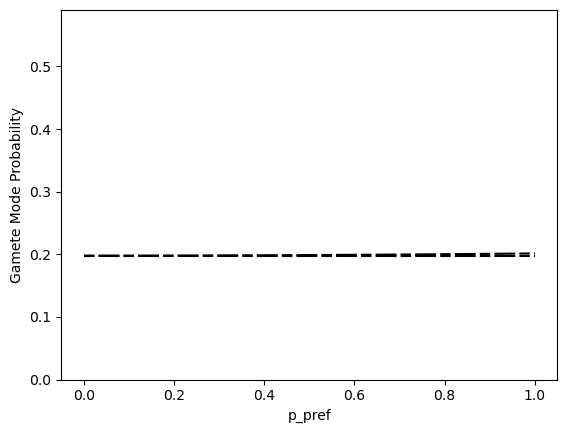

In [10]:
x = np.linspace(0,1, 10)
y_middle_iijj_down = [middle_iijj.subs(rp,(1 - (1 - 2 * r)**(1/2))/2)\
                                                           .subs(qp,(1 - (1 - 2 * q)**(1/2))/2)\
                                                           .subs(vp,(1 - (1 - 2 * v)**(1/2))/2)\
                                                            .subs(r,1/2).subs(q,1/2).subs(v,1/2)\
                                                            .subs(t,2/3)\
                                                            .subs(ppc,1/4).subs(pmp,1/4).subs(pdm,1/4)\
                                                            .subs(p_pair,1 - item) for item in x]
y_middle_ijkl_down = [middle_ijkl.subs(rp,(1 - (1 - 2 * r)**(1/2))/2)\
                                                           .subs(qp,(1 - (1 - 2 * q)**(1/2))/2)\
                                                           .subs(vp,(1 - (1 - 2 * v)**(1/2))/2)\
                                                            .subs(r,1/2).subs(q,1/2).subs(v,1/2)\
                                                            .subs(t,2/3)\
                                                            .subs(ppc,1/4).subs(pmp,1/4).subs(pdm,1/4)\
                                                            .subs(p_pair,1 - item) for item in x]

plt.plot(x, y_middle_iijj_down,dashes=[5, 2, 10, 2],color='k')
plt.plot(x, y_middle_ijkl_down,dashes=[5, 2, 10, 2],color='k')
plt.ylim(0,0.59)
plt.xlabel('p_pref')
plt.ylabel('Gamete Mode Probability')

plt.show()